# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

('Number of data points in train data', (109248, 17))
--------------------------------------------------
('The attributes of data :', array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'project_is_approved'], dtype=object))


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

('Number of data points in train data', (1541272, 4))
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_")
    project_grade_category.append(a)

In [7]:
project_grade_category[0:5]

['Grades_PreK-2', 'Grades_6-8', 'Grades_6-8', 'Grades_PreK-2', 'Grades_PreK-2']

In [8]:
project_data.drop(['project_grade_category'], axis=1, inplace=True)

In [9]:
project_data["project_grade_category"] = project_grade_category

In [10]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date project_subject_categories  \
55660           CA 2016-04-27 00:27:36             Math & Science   
76127           UT 2016-04-27 00:31:25              Special Needs   
51140           CA 2016-04-27 00:46:53        Literacy & Language   
473             GA 2016-04-27 00:53:00           Applied Learning   
41558           WA 2016-04-27 01:05:25        Literacy & Language   

                 project_subject_subcategories  \
55660  Applied Sciences, Health & Life Science   
76127                            Special Needs   
51140                                 Literacy   
473                          Early Development   
41558                                 Literacy   

                                        project_title  \
55660    Engineering STEAM into the Primary Classroom   
76127                         Sensory Tools for Focus   
51140  Mobile Learning with a Mobile Listening Center   
473            Flexible Seating for Flexible Learning   
41558          Going Deep: The Art of Inner Thinking!   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

      project_grade_category  
55660          Grades_PreK-2  
76127             Grades_6-8  
51140             Grades_6-8  
473            Grades_PreK-2  
41558          Grades_PreK-2

## 1.2 preprocessing of `project_subject_categories`

In [11]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [12]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.4 Clean Titles (Text preprocessing)

In [13]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
clean_titles = []

for titles in tqdm(project_data["project_title"]):
    title = decontracted(titles)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    clean_titles.append(title.lower().strip())

100%|██████████| 109248/109248 [00:04<00:00, 25573.25it/s]


In [16]:
project_data["clean_titles"] = clean_titles

In [17]:
project_data.drop(['project_title'], axis=1, inplace=True)

## 1.5 Introducing new feature "Number of Words in Title"

In [18]:
title_word_count = []

In [19]:
for a in project_data["clean_titles"] :
    b = len(a.split())
    title_word_count.append(b)

In [20]:
project_data["title_word_count"] = title_word_count

In [21]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
55660           CA 2016-04-27 00:27:36   
76127           UT 2016-04-27 00:31:25   
51140           CA 2016-04-27 00:46:53   
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

      project_grade_category   clean_categories  \
55660          Grades_PreK-2       Math_Science   
76127             Grades_6-8       SpecialNeeds   
51140             Grades_6-8  Literacy_Language   
473            Grades_PreK-2    AppliedLearning   
41558          Grades_PreK-2  Literacy_Language   

                      clean_subcategories  \
55660  AppliedSciences Health_LifeScience   
76127                        SpecialNeeds   
51140                            Literacy   
473                      EarlyDevelopment   
41558                            Literacy   

                                  clean_titles  title_word_count  
55660      engineering steam primary classroom                 4  
76127                      sensory tools focus                 3  
51140  mobile learning mobile listening center                 5  
473         flexible seating flexible learning                 4  
41558        going deep the art inner thinking                 6

## 1.6 Combine 4 Project essays into 1 Essay 

In [22]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

## 1.7 Clean Essays (Text preprocessing)

In [23]:
clean_essay = []

for ess in tqdm(project_data["essay"]):
    ess = decontracted(ess)
    ess = ess.replace('\\r', ' ')
    ess = ess.replace('\\"', ' ')
    ess = ess.replace('\\n', ' ')
    ess = re.sub('[^A-Za-z0-9]+', ' ', ess)
    ess = ' '.join(f for f in ess.split() if f not in stopwords)
    clean_essay.append(ess.lower().strip())

100%|██████████| 109248/109248 [01:03<00:00, 1732.54it/s]


In [24]:
project_data["clean_essays"] = clean_essay

In [25]:
project_data.drop(['essay'], axis=1, inplace=True)

## 1.8 Introducing new feature "Number of Words in Essay"

In [26]:
essay_word_count = []

In [27]:
for ess in project_data["clean_essays"] :
    c = len(ess.split())
    essay_word_count.append(c)

In [28]:
project_data["essay_word_count"] = essay_word_count

In [29]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
55660           CA 2016-04-27 00:27:36   
76127           UT 2016-04-27 00:31:25   
51140           CA 2016-04-27 00:46:53   
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   
51140  A mobile listening center will help keep equip...   
473    Benjamin Franklin once said, \"Tell me and I f...   
41558  These remarkable gifts will provide students w...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   
51140  My students need a mobile listening center to ...   
473    My students need flexible seating in the class...   
41558  My students need copies of the New York Times ...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   
51140                                            10                    1   
473                                               2                    1   
41558                                             2                    1   

      project_grade_category   clean_categories  \
55660          Grades_PreK-2       Math_Science   
76127             Grades_6-8       SpecialNeeds   
51140             Grades_6-8  Literacy_Language   
473            Grades_PreK-2    AppliedLearning   
41558          Grades_PreK-2  Literacy_Language   

                      clean_subcategories  \
55660  AppliedSciences Health_LifeScience   
76127                        SpecialNeeds   
51140                            Literacy   
473                      EarlyDevelopment   
41558                            Literacy   

                                  clean_titles  title_word_count  \
55660      engineering steam primary classroom                 4   
76127                      sensory tools focus                 3   
51140  mobile learning mobile listening center                 5   
473         flexible seating flexible learning                 4   
41558        going deep the art inner thinking                 6   

                              

## 1.9 Calculate Sentiment Scores for the essays

In [30]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [31]:
analyser = SentimentIntensityAnalyzer()

In [32]:
neg = []
pos = []
neu = []
compound = []

for a in tqdm(project_data["clean_essays"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)

100%|██████████| 109248/109248 [20:28<00:00, 88.95it/s] 


In [33]:
project_data["pos"] = pos

In [34]:
project_data["neg"] = neg

In [35]:
project_data["neu"] = neu

In [36]:
project_data["compound"] = compound

In [37]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
51140       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
41558       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

      school_state                Date  \
55660           CA 2016-04-27 00:27:36   
76127           UT 2016-04-27 00:31:25   
51140           CA 2016-04-27 00:46:53   
473             GA 2016-04-27 00:53:00   
41558           WA 2016-04-27 01:05:25   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   
51140  Having a class of 24 students comes with diver...   
473    I recently read an article about giving studen...   
41558  My students crave challenge, they eat obstacle...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   
51140  I have a class of twenty-four kindergarten stu...   
473    I teach at a low-income (Title 1) school. Ever...   
41558  We are an urban, public k-5 elementary school....   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   
51140  By having a mobile listening and storage cente...   
473    We need a classroom rug that we can use as a c...   
41558  With the new common core standards that have b...   

                                         project_essay_4    ...     \
55660  It is challenging to develop high quality scie...    ...      
76127  When my students are able to calm themselves d...    ...      
51140  A mobile listening center will help keep equip...    ...      
473    Benjamin Franklin once said, \"Tell me and I f...    ...      
41558  These remarkable gifts will provide students w...    ...      

        clean_categories                 clean_subcategories  \
55660       Math_Science  AppliedSciences Health_LifeScience   
76127       SpecialNeeds                        SpecialNeeds   
51140  Literacy_Language                            Literacy   
473      AppliedLearning                    EarlyDevelopment   
41558  Literacy_Language                            Literacy   

                                  clean_titles title_word_count  \
55660      engineering steam primary classroom                4   
76127                      sensory tools focus                3   
51140  mobile learning mobile listening center                5   
473         flexible seating flexible learning                4   
41558        going deep the art inner thinking                6   

                                            clean_essays essay_word_count  \
55660  i fortunate enough use fairy tale stem kits cl...              175   
76127  imagine 8 9 years old you third grade classroo...              179   
51140  having class 24 students comes diverse learner...              116   
473    i recently read article giving students choice...              127   
41558  my students crave challenge eat obstacles brea...              114   

         pos    neg    neu  compound  
55660  0.205  0.013  0.783    0.9867  
76127  0.248  0.072  0.680    0.9897  
51140  0.262  0.017  0.721    0.9860  
473    0.187  0.030  0.783    0.9524  
41558  0.288  0.029  0.683    0.9873  

[5 rows x 24 columns]

## 1.10 Test - Train Split

In [38]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])

## Preparing data for models

In [39]:
project_data.columns

Index([u'Unnamed: 0', u'id', u'teacher_id', u'teacher_prefix', u'school_state',
       u'Date', u'project_essay_1', u'project_essay_2', u'project_essay_3',
       u'project_essay_4', u'project_resource_summary',
       u'teacher_number_of_previously_posted_projects', u'project_is_approved',
       u'project_grade_category', u'clean_categories', u'clean_subcategories',
       u'clean_titles', u'title_word_count', u'clean_essays',
       u'essay_word_count', u'pos', u'neg', u'neu', u'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## 2.1 Vectorizing Text data

## A) Bag of Words (BOW) with min_df=10 

### Bag of words - Train Data - Essays

In [40]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).

vectorizer_bow_essay = CountVectorizer(min_df=10)

vectorizer_bow_essay.fit(X_train["clean_essays"])

text_bow_train = vectorizer_bow_essay.transform(X_train["clean_essays"])

print("Shape of matrix after one hot encoding ",text_bow_train.shape)

('Shape of matrix after one hot encoding ', (73196, 14214))


### Bag of words - Test Data - Essays

In [41]:
text_bow_test = vectorizer_bow_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

('Shape of matrix after one hot encoding ', (36052, 14214))


### Bag of words - Train Data - Titles

In [42]:
vectorizer_bow_title = CountVectorizer(min_df=10)

vectorizer_bow_title.fit(X_train["clean_titles"])

title_bow_train = vectorizer_bow_title.transform(X_train["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

('Shape of matrix after one hot encoding ', (73196, 2646))


### Bag of words - Test Data - Titles

In [43]:
title_bow_test = vectorizer_bow_title.transform(X_test["clean_titles"])
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

('Shape of matrix after one hot encoding ', (36052, 2646))


## B) TFIDF vectorizer with min_df=10

### TFIDF - Train Data - Essays

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(X_train["clean_essays"])

text_tfidf_train = vectorizer_tfidf_essay.transform(X_train["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

('Shape of matrix after one hot encoding ', (73196, 14214))


### TFIDF - Test Data - Essays

In [45]:
text_tfidf_test = vectorizer_tfidf_essay.transform(X_test["clean_essays"])
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

('Shape of matrix after one hot encoding ', (36052, 14214))


### TFIDF - Train Data - Titles

In [46]:
vectorizer_tfidf_titles = TfidfVectorizer(min_df=10)

vectorizer_tfidf_titles.fit(X_train["clean_titles"])
title_tfidf_train = vectorizer_tfidf_titles.transform(X_train["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

('Shape of matrix after one hot encoding ', (73196, 2646))


### TFIDF - Test Data - Titles

In [47]:
title_tfidf_test = vectorizer_tfidf_titles.transform(X_test["clean_titles"])
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

('Shape of matrix after one hot encoding ', (36052, 2646))


## C) Using Pretrained Models : AVG W2V

In [48]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039

def loadGloveModel(gloveFile):
    
    print ("Loading Glove Model")
    
    f = open(gloveFile,'r')
    
    model = {}
    
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    
    print ("Done.",len(model)," words loaded!")
    
    return model

In [49]:
model = loadGloveModel('glove.42B.300d.txt')

923it [00:00, 9229.90it/s]

Loading Glove Model


1917495it [03:37, 8830.04it/s]

('Done.', 1917495, ' words loaded!')


In [50]:
words_train_essays = []

for i in X_train["clean_essays"] :
    words_train_essays.extend(i.split(' '))

In [51]:
## Find the total number of words in the Train data of Essays.

print("All the words in the corpus", len(words_train_essays))

('All the words in the corpus', 11081716)


In [52]:
## Find the unique words in this set of words

words_train_essay = set(words_train_essays)
print("the unique words in the corpus", len(words_train_essay))

('the unique words in the corpus', 48135)


In [53]:
## Find the words present in both Glove Vectors as well as our corpus.

inter_words = set(model.keys()).intersection(words_train_essay)

print("The number of words that are present in both glove vectors and our corpus are {} which \
is nearly {}% ".format(len(inter_words), np.round((float(len(inter_words))/len(words_train_essay))*100)))

The number of words that are present in both glove vectors and our corpus are 43346 which is nearly 90.0% 


In [54]:
words_corpus_train_essay = {}

words_glove = set(model.keys())

for i in words_train_essay:
    if i in words_glove:
        words_corpus_train_essay[i] = model[i]

print("word 2 vec length", len(words_corpus_train_essay))

('word 2 vec length', 43346)


In [55]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_corpus_train_essay, f)

In [56]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

### Train - Essays

In [57]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_train = []; 

for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 73196/73196 [00:29<00:00, 2470.81it/s]

73196
300


### Test - Essays

In [58]:
# average Word2Vec
# compute average word2vec for each review.

avg_w2v_vectors_test = []; 

for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [00:12<00:00, 2966.68it/s]

36052
300


### Train - Titles

In [59]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_train.append(vector)

print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|██████████| 73196/73196 [00:02<00:00, 28240.03it/s]

73196
300


### Test - Titles

In [60]:
# Similarly you can vectorize for title also

avg_w2v_vectors_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_titles"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles_test.append(vector)

print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|██████████| 36052/36052 [00:01<00:00, 32863.73it/s]

36052
300


## D) Using Pretrained Models: TFIDF weighted W2V

### Train - Essays

In [61]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_essays"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [62]:
# Tfidf Word2Vec
# compute Tfidf word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 73196/73196 [02:36<00:00, 468.18it/s]

73196
300


### Test - Essays

In [63]:
# compute Tfidf word2vec for each review.

tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["clean_essays"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [01:16<00:00, 473.94it/s]

36052
300


### Train - Titles

In [64]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["clean_titles"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [65]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_train = []; 

for sentence in tqdm(X_train["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_train.append(vector)

print(len(tfidf_w2v_vectors_titles_train))
print(len(tfidf_w2v_vectors_titles_train[0]))

100%|██████████| 73196/73196 [00:02<00:00, 26360.93it/s]

73196
300


### Test - Titles

In [66]:
# compute average word2vec for each review.

tfidf_w2v_vectors_titles_test = []; 

for sentence in tqdm(X_test["clean_titles"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_titles_test.append(vector)

print(len(tfidf_w2v_vectors_titles_test))
print(len(tfidf_w2v_vectors_titles_test[0]))

100%|██████████| 36052/36052 [00:01<00:00, 25907.41it/s]

36052
300


## 2.2 Vectorizing Numerical features

In [67]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [68]:
# join two dataframes in python: 
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

### A) Price

In [69]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(-1,1))

price_train = normalizer.transform(X_train['price'].values.reshape(-1,1))
price_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


### B) Quantity

In [70]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(-1,1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(quantity_train.shape, y_train.shape)
print(quantity_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


### C) Number of Projects previously proposed by Teacher

In [71]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


### D) Title word Count

In [72]:
normalizer = Normalizer()

normalizer.fit(X_train['title_word_count'].values.reshape(-1,1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(-1,1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


### E) Essay word Count

In [73]:
normalizer = Normalizer()

normalizer.fit(X_train['essay_word_count'].values.reshape(-1,1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(-1,1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


### F) Essay Sentiments - pos

In [74]:
normalizer = Normalizer()

normalizer.fit(X_train['pos'].values.reshape(-1,1))

essay_sent_pos_train = normalizer.transform(X_train['pos'].values.reshape(-1,1))
essay_sent_pos_test = normalizer.transform(X_test['pos'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_pos_train.shape, y_train.shape)
print(essay_sent_pos_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


### G) Essay Sentiments - neg

In [75]:
normalizer = Normalizer()

normalizer.fit(X_train['neg'].values.reshape(-1,1))

essay_sent_neg_train = normalizer.transform(X_train['neg'].values.reshape(-1,1))
essay_sent_neg_test = normalizer.transform(X_test['neg'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_neg_train.shape, y_train.shape)
print(essay_sent_neg_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


### H) Essay Sentiments - neu

In [76]:
normalizer = Normalizer()

normalizer.fit(X_train['neu'].values.reshape(-1,1))

essay_sent_neu_train = normalizer.transform(X_train['neu'].values.reshape(-1,1))
essay_sent_neu_test = normalizer.transform(X_test['neu'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_neu_train.shape, y_train.shape)
print(essay_sent_neu_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


### I) Essay Sentiments - compound

In [77]:
normalizer = Normalizer()

normalizer.fit(X_train['compound'].values.reshape(-1,1))

essay_sent_comp_train = normalizer.transform(X_train['compound'].values.reshape(-1,1))
essay_sent_comp_test = normalizer.transform(X_test['compound'].values.reshape(-1,1))

print("After vectorizations")
print(essay_sent_comp_train.shape, y_train.shape)
print(essay_sent_comp_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


## 2.3 Response coding for Categorical Data

# A) School State - Response Coding

## Step 1 : Find counts of each

In [78]:
X_train.columns

Index([u'Unnamed: 0', u'id', u'teacher_id', u'teacher_prefix', u'school_state',
       u'Date', u'project_essay_1', u'project_essay_2', u'project_essay_3',
       u'project_essay_4', u'project_resource_summary',
       u'teacher_number_of_previously_posted_projects', u'project_is_approved',
       u'project_grade_category', u'clean_categories', u'clean_subcategories',
       u'clean_titles', u'title_word_count', u'clean_essays',
       u'essay_word_count', u'pos', u'neg', u'neu', u'compound', u'price',
       u'quantity'],
      dtype='object')

In [79]:
X_train_pos = X_train.loc[X_train['project_is_approved'] == 1]

In [80]:
school_state_pos = {}

for a in X_train_pos['school_state'] :
    if a not in school_state_pos :
        school_state_pos[a] = 1
    else :
        school_state_pos[a] += 1

In [81]:
school_state_pos

{'AK': 190,
 'AL': 1005,
 'AR': 570,
 'AZ': 1218,
 'CA': 8834,
 'CO': 618,
 'CT': 958,
 'DC': 273,
 'DE': 208,
 'FL': 3434,
 'GA': 2287,
 'HI': 284,
 'IA': 389,
 'ID': 371,
 'IL': 2469,
 'IN': 1517,
 'KS': 342,
 'KY': 756,
 'LA': 1348,
 'MA': 1364,
 'MD': 861,
 'ME': 274,
 'MI': 1834,
 'MN': 702,
 'MO': 1444,
 'MS': 715,
 'MT': 136,
 'NC': 2872,
 'ND': 77,
 'NE': 186,
 'NH': 206,
 'NJ': 1263,
 'NM': 305,
 'NV': 779,
 'NY': 4231,
 'OH': 1459,
 'OK': 1257,
 'OR': 718,
 'PA': 1797,
 'RI': 176,
 'SC': 2271,
 'SD': 166,
 'TN': 967,
 'TX': 4050,
 'UT': 964,
 'VA': 1161,
 'VT': 36,
 'WA': 1375,
 'WI': 1042,
 'WV': 296,
 'WY': 58}

In [82]:
## Select only 0 = project is approved elements

X_train_neg = X_train.loc[X_train['project_is_approved'] == 0]

In [83]:
school_state_neg = {}

for a in X_train_neg['school_state'] :
    if a not in school_state_neg :
        school_state_neg[a] = 1
    else :
        school_state_neg[a] += 1

In [84]:
school_state_neg

{'AK': 38,
 'AL': 163,
 'AR': 115,
 'AZ': 217,
 'CA': 1479,
 'CO': 127,
 'CT': 154,
 'DC': 70,
 'DE': 23,
 'FL': 695,
 'GA': 430,
 'HI': 46,
 'IA': 69,
 'ID': 76,
 'IL': 428,
 'IN': 259,
 'KS': 66,
 'KY': 120,
 'LA': 277,
 'MA': 221,
 'MD': 151,
 'ME': 48,
 'MI': 312,
 'MN': 106,
 'MO': 250,
 'MS': 150,
 'MT': 31,
 'NC': 505,
 'ND': 8,
 'NE': 27,
 'NH': 32,
 'NJ': 241,
 'NM': 57,
 'NV': 125,
 'NY': 707,
 'OH': 209,
 'OK': 245,
 'OR': 134,
 'PA': 290,
 'RI': 29,
 'SC': 355,
 'SD': 35,
 'TN': 173,
 'TX': 945,
 'UT': 178,
 'VA': 209,
 'VT': 11,
 'WA': 191,
 'WI': 192,
 'WV': 53,
 'WY': 11}

In [85]:
school_state_total = {}

for a in X_train['school_state'] :
    if a not in school_state_total :
        school_state_total[a] = 1
    else :
        school_state_total[a] += 1

In [86]:
school_state_total

{'AK': 228,
 'AL': 1168,
 'AR': 685,
 'AZ': 1435,
 'CA': 10313,
 'CO': 745,
 'CT': 1112,
 'DC': 343,
 'DE': 231,
 'FL': 4129,
 'GA': 2717,
 'HI': 330,
 'IA': 458,
 'ID': 447,
 'IL': 2897,
 'IN': 1776,
 'KS': 408,
 'KY': 876,
 'LA': 1625,
 'MA': 1585,
 'MD': 1012,
 'ME': 322,
 'MI': 2146,
 'MN': 808,
 'MO': 1694,
 'MS': 865,
 'MT': 167,
 'NC': 3377,
 'ND': 85,
 'NE': 213,
 'NH': 238,
 'NJ': 1504,
 'NM': 362,
 'NV': 904,
 'NY': 4938,
 'OH': 1668,
 'OK': 1502,
 'OR': 852,
 'PA': 2087,
 'RI': 205,
 'SC': 2626,
 'SD': 201,
 'TN': 1140,
 'TX': 4995,
 'UT': 1142,
 'VA': 1370,
 'VT': 47,
 'WA': 1566,
 'WI': 1234,
 'WV': 349,
 'WY': 69}

In [87]:
xx = school_state_total.keys()[0]

In [88]:
school_state_pos[xx]

1375

In [89]:
xx

'WA'

In [90]:
school_state_neg[xx]

191

## Step 2 : Find Probabilities with respect to classes

In [91]:
pos_prob_state = {}

for state in school_state_total.keys():
    pos_prob_state[state] = (school_state_pos[state])/float(school_state_total[state])

In [92]:
pos_prob_state

{'AK': 0.8333333333333334,
 'AL': 0.860445205479452,
 'AR': 0.8321167883211679,
 'AZ': 0.848780487804878,
 'CA': 0.8565887714535053,
 'CO': 0.8295302013422818,
 'CT': 0.8615107913669064,
 'DC': 0.7959183673469388,
 'DE': 0.9004329004329005,
 'FL': 0.831678372487285,
 'GA': 0.8417372101582627,
 'HI': 0.8606060606060606,
 'IA': 0.8493449781659389,
 'ID': 0.8299776286353467,
 'IL': 0.8522609596133932,
 'IN': 0.8541666666666666,
 'KS': 0.8382352941176471,
 'KY': 0.863013698630137,
 'LA': 0.8295384615384616,
 'MA': 0.8605678233438486,
 'MD': 0.8507905138339921,
 'ME': 0.8509316770186336,
 'MI': 0.8546132339235788,
 'MN': 0.8688118811881188,
 'MO': 0.8524203069657615,
 'MS': 0.8265895953757225,
 'MT': 0.8143712574850299,
 'NC': 0.8504589872668049,
 'ND': 0.9058823529411765,
 'NE': 0.8732394366197183,
 'NH': 0.865546218487395,
 'NJ': 0.8397606382978723,
 'NM': 0.8425414364640884,
 'NV': 0.8617256637168141,
 'NY': 0.8568246253543945,
 'OH': 0.8747002398081535,
 'OK': 0.8368841544607191,
 'OR':

In [93]:
neg_prob_state = {}

for state in school_state_total.keys():
    neg_prob_state[state] = (school_state_neg[state])/float(school_state_total[state])

In [94]:
neg_prob_state

{'AK': 0.16666666666666666,
 'AL': 0.13955479452054795,
 'AR': 0.1678832116788321,
 'AZ': 0.15121951219512195,
 'CA': 0.1434112285464947,
 'CO': 0.1704697986577181,
 'CT': 0.13848920863309352,
 'DC': 0.20408163265306123,
 'DE': 0.09956709956709957,
 'FL': 0.16832162751271496,
 'GA': 0.15826278984173722,
 'HI': 0.1393939393939394,
 'IA': 0.15065502183406113,
 'ID': 0.17002237136465326,
 'IL': 0.14773904038660685,
 'IN': 0.14583333333333334,
 'KS': 0.16176470588235295,
 'KY': 0.136986301369863,
 'LA': 0.17046153846153847,
 'MA': 0.13943217665615143,
 'MD': 0.1492094861660079,
 'ME': 0.14906832298136646,
 'MI': 0.14538676607642126,
 'MN': 0.1311881188118812,
 'MO': 0.14757969303423848,
 'MS': 0.17341040462427745,
 'MT': 0.18562874251497005,
 'NC': 0.14954101273319514,
 'ND': 0.09411764705882353,
 'NE': 0.1267605633802817,
 'NH': 0.13445378151260504,
 'NJ': 0.16023936170212766,
 'NM': 0.1574585635359116,
 'NV': 0.13827433628318583,
 'NY': 0.1431753746456055,
 'OH': 0.12529976019184652,
 'O

## Step 3 : Apply probabilities to Train data

In [95]:
state_0_train = []
state_1_train = []

for a in X_train["school_state"] :
    state_0_train.append(neg_prob_state[a])
    state_1_train.append(pos_prob_state[a])

In [96]:
X_train["state_0"] =state_0_train

In [97]:
X_train["state_1"] = state_1_train

In [98]:
X_train.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      107849  p138154  b49b78d370eb50f2890a28c780bf01af           Mrs.   
1       55001  p024281  cdaec293d7d05b72484e58e7f7ca9295           Mrs.   
2       69831  p009834  43dde0654aca2a4c6e2b6d5515c6e98b           Mrs.   
3      162343  p211681  1c0033542d44d4ed8959d303175562a6            Ms.   
4       22291  p195875  02b58251be73a2eadf89a2a7a197140c            Ms.   

  school_state                Date  \
0           IN 2016-07-29 19:49:09   
1           CA 2016-10-24 13:28:05   
2           CA 2017-01-21 00:03:28   
3           CA 2016-11-03 00:59:14   
4           OR 2016-09-28 21:11:48   

                                     project_essay_1  \
0  Our school is in an urban community consisting...   
1  My classroom is made up of a diverse group of ...   
2  My third grade students are energetic and enth...   
3  Amazing, that is what describes the students t...   
4  \"I used to hate reading and now I love it.\" ...   

                                     project_essay_2 project_essay_3  \
0  The books will be used in order to attract and...             NaN   
1  Each week, students and I take photos of their...             NaN   
2  My students are excited to learn across the cu...             NaN   
3  My students will use these iPads throughout th...             NaN   
4  My 3rd students have a 30 minute block of time...             NaN   

  project_essay_4    ...     \
0             NaN    ...      
1             NaN    ...      
2             NaN    ...      
3             NaN    ...      
4             NaN    ...      

                                        clean_essays  essay_word_count    pos  \
0  our school urban community consisting 71 stude...               129  0.206   
1  my classroom made diverse group young men wome...               139  0.266   
2  my third grade students energetic enthusiastic...               165  0.231   
3  amazing describes students walk door every day...               142  0.352   
4  i used hate reading i love this one quotes i g...               219  0.297   

     neg    neu compound   price  quantity   state_0   state_1  
0  0.031  0.762   0.9719  360.71         8  0.145833  0.854167  
1  0.056  0.678   0.9882  229.99         1  0.143411  0.856589  
2  0.032  0.737   0.9854  638.73       105  0.143411  0.856589  
3  0.036  0.612   0.9944  559.98        10  0.143411  0.856589  
4  0.044  0.659   0.9970    6.81        30  0.157277  0.842723  

[5 rows x 28 columns]

## Step 4 : Apply probabilities to Test data

In [99]:
state_0_test = []
state_1_test = []

for a in X_test["school_state"] :
    state_0_test.append(neg_prob_state[a])
    state_1_test.append(pos_prob_state[a])

In [100]:
X_test["state_0"] =state_0_test

In [101]:
X_test["state_1"] =state_1_test

In [102]:
X_test.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      137859  p252401  fbc1400e8289f9d40f3d32d3353999e4            Mr.   
1       50674  p105446  ee54cd2151a66c5901fbed2ae15aa2cb           Mrs.   
2       30062  p240487  57cfebbc3b4f64e34656c56123d90dbf           Mrs.   
3      116425  p256363  111a37725bf44d807563d4889ddbabcd           Mrs.   
4      174481  p182629  7c82e1254f2c74af9ac169d33814e9f2           Mrs.   

  school_state                Date  \
0           WY 2017-02-25 20:20:09   
1           NC 2016-07-31 20:32:21   
2           IL 2017-03-10 00:02:20   
3           CA 2017-01-19 11:25:33   
4           WA 2016-05-26 00:46:28   

                                     project_essay_1  \
0  Our school district serves four communities an...   
1  I teach middle class students who are eager to...   
2  My students are Kindergarteners at Rupley Elem...   
3  My students are eager for knowledge. Together ...   
4  My little loves are so special to me for many ...   

                                     project_essay_2 project_essay_3  \
0  I started a high school Inventors Club seeking...             NaN   
1  Who wants to sit at a desk all day and never b...             NaN   
2  My students come from low income homes where t...             NaN   
3  Our classroom needs headphones to help bring 2...             NaN   
4  Having these wobble chairs in my classroom wil...             NaN   

  project_essay_4    ...     \
0             NaN    ...      
1             NaN    ...      
2             NaN    ...      
3             NaN    ...      
4             NaN    ...      

                                        clean_essays  essay_word_count    pos  \
0  our school district serves four communities su...               269  0.132   
1  i teach middle class students eager learn succ...               136  0.217   
2  my students kindergarteners rupley elementary ...               124  0.207   
3  my students eager knowledge together create lo...               110  0.284   
4  my little loves special many reasons if never ...               153  0.366   

     neg    neu compound   price  quantity   state_0   state_1  
0  0.013  0.856   0.9804  115.99         8  0.159420  0.840580  
1  0.022  0.761   0.9808  334.93         8  0.149541  0.850459  
2  0.054  0.739   0.9732  580.85        50  0.147739  0.852261  
3  0.067  0.649   0.9814   17.07        16  0.143411  0.856589  
4  0.072  0.562   0.9956   64.46         4  0.121967  0.878033  

[5 rows x 28 columns]

## Step 5 : Normalize for 0

In [103]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train["state_0"].values.reshape(-1,1))

state_0_train = normalizer.transform(X_train["state_0"].values.reshape(-1,1))
state_0_test = normalizer.transform(X_test["state_0"].values.reshape(-1,1))

print("After vectorizations")
print(state_0_train.shape, y_train.shape)
print(state_0_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


## Step 6 : Normalize for 1

In [104]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train["state_1"].values.reshape(-1,1))

state_1_train = normalizer.transform(X_train["state_1"].values.reshape(-1,1))
state_1_test = normalizer.transform(X_test["state_1"].values.reshape(-1,1))

print("After vectorizations")
print(state_1_train.shape, y_train.shape)
print(state_1_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


# B) Categories of Projects- Response Coding

## Step 1 : Find counts of each

In [105]:
X_train.columns

Index([u'Unnamed: 0', u'id', u'teacher_id', u'teacher_prefix', u'school_state',
       u'Date', u'project_essay_1', u'project_essay_2', u'project_essay_3',
       u'project_essay_4', u'project_resource_summary',
       u'teacher_number_of_previously_posted_projects', u'project_is_approved',
       u'project_grade_category', u'clean_categories', u'clean_subcategories',
       u'clean_titles', u'title_word_count', u'clean_essays',
       u'essay_word_count', u'pos', u'neg', u'neu', u'compound', u'price',
       u'quantity', u'state_0', u'state_1'],
      dtype='object')

In [106]:
clean_category_pos = {}

for a in X_train_pos['clean_categories'] :
    for b in a.split():
        if b not in clean_category_pos :
            clean_category_pos[b] = 1
        else :
            clean_category_pos[b] += 1

In [107]:
clean_category_pos

{'AppliedLearning': 6776,
 'Care_Hunger': 829,
 'Health_Sports': 8029,
 'History_Civics': 3440,
 'Literacy_Language': 30386,
 'Math_Science': 23306,
 'Music_Arts': 5835,
 'SpecialNeeds': 7633,
 'Warmth': 829}

In [108]:
clean_category_neg = {}

for a in X_train_neg['clean_categories'] :
    for b in a.split():
        if b not in clean_category_neg :
            clean_category_neg[b] = 1
        else :
            clean_category_neg[b] += 1

In [109]:
clean_category_neg

{'AppliedLearning': 1396,
 'Care_Hunger': 80,
 'Health_Sports': 1447,
 'History_Civics': 582,
 'Literacy_Language': 4696,
 'Math_Science': 4420,
 'Music_Arts': 1089,
 'SpecialNeeds': 1508,
 'Warmth': 80}

In [110]:
clean_category_total = {}

for a in X_train['clean_categories'] :
    for b in a.split():
        if b not in clean_category_total :
            clean_category_total[b] = 1
        else :
            clean_category_total[b] += 1

In [111]:
clean_category_total

{'AppliedLearning': 8172,
 'Care_Hunger': 909,
 'Health_Sports': 9476,
 'History_Civics': 4022,
 'Literacy_Language': 35082,
 'Math_Science': 27726,
 'Music_Arts': 6924,
 'SpecialNeeds': 9141,
 'Warmth': 909}

## Step 2 : Find Probabilities with respect to classes

In [112]:
pos_prob_category = {}

for st in clean_category_total.keys():
    pos_prob_category[st] = (clean_category_pos[st])/float(clean_category_total[st])

In [113]:
pos_prob_category

{'AppliedLearning': 0.8291727851199217,
 'Care_Hunger': 0.911991199119912,
 'Health_Sports': 0.847298438159561,
 'History_Civics': 0.8552958727001492,
 'Literacy_Language': 0.8661421811755317,
 'Math_Science': 0.8405828464257376,
 'Music_Arts': 0.8427209705372617,
 'SpecialNeeds': 0.8350289902636473,
 'Warmth': 0.911991199119912}

In [114]:
neg_prob_category = {}

for stt in clean_category_total.keys():
    neg_prob_category[stt] = (clean_category_neg[stt])/float(clean_category_total[stt])

In [115]:
neg_prob_category

{'AppliedLearning': 0.17082721488007832,
 'Care_Hunger': 0.08800880088008801,
 'Health_Sports': 0.152701561840439,
 'History_Civics': 0.14470412729985083,
 'Literacy_Language': 0.1338578188244684,
 'Math_Science': 0.15941715357426242,
 'Music_Arts': 0.1572790294627383,
 'SpecialNeeds': 0.1649710097363527,
 'Warmth': 0.08800880088008801}

## Step 3 : Apply probabilities to Train data

In [116]:
cat_0_train = []
cat_1_train = []

for a in X_train["clean_categories"] :
    b = a.split()
    if len(b) == 1 :
        cat_0_train.append(neg_prob_category[a])
        cat_1_train.append(pos_prob_category[a])
    else :
        c = neg_prob_category[b[0]]
        d = neg_prob_category[b[1]]
        e = pos_prob_category[b[0]]
        f = pos_prob_category[b[1]]
        
        cat_0_train.append(c*d)
        cat_1_train.append(e*f)

In [117]:
cat_0_train[0:10]

[0.1338578188244684,
 0.021053027830711453,
 0.15941715357426242,
 0.021339232460656075,
 0.1338578188244684,
 0.007745549032350981,
 0.15941715357426242,
 0.15941715357426242,
 0.1649710097363527,
 0.1649710097363527]

In [118]:
cat_1_train[0:10]

[0.8661421811755317,
 0.7299161795435047,
 0.8405828464257376,
 0.7280642600619253,
 0.8661421811755317,
 0.831727947272175,
 0.8405828464257376,
 0.8405828464257376,
 0.8350289902636473,
 0.8350289902636473]

In [119]:
X_train["cat_0"] = cat_0_train

In [120]:
X_train["cat_1"] = cat_1_train

## Step 4 : Apply probabilities to Test data

In [121]:
cat_0_test = []
cat_1_test = []

for a in X_test["clean_categories"] :
    b = a.split()
    if len(b) == 1 :
        cat_0_test.append(neg_prob_category[a])
        cat_1_test.append(pos_prob_category[a])
    else :
        c = neg_prob_category[b[0]]
        d = neg_prob_category[b[1]]
        e = pos_prob_category[b[0]]
        f = pos_prob_category[b[1]]
        
        cat_0_test.append(c*d)
        cat_1_test.append(e*f)

In [122]:
X_test["cat_0"] = cat_0_test

In [123]:
X_test["cat_1"] = cat_1_test

## Step 5 : Normalize for 0

In [124]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train["cat_0"].values.reshape(-1,1))

cat_0_train = normalizer.transform(X_train["cat_0"].values.reshape(-1,1))
cat_0_test = normalizer.transform(X_test["cat_0"].values.reshape(-1,1))

print("After vectorizations")
print(cat_0_train.shape, y_train.shape)
print(cat_0_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


## Step 6 : Normalize for 1

In [125]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train["cat_1"].values.reshape(-1,1))

cat_1_train = normalizer.transform(X_train["cat_1"].values.reshape(-1,1))
cat_1_test = normalizer.transform(X_test["cat_1"].values.reshape(-1,1))

print("After vectorizations")
print(cat_1_train.shape, y_train.shape)
print(cat_1_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


# C) Sub-Categories of Projects- Response Coding

## Step 1 : Find counts of each

In [126]:
clean_subcategory_pos = {}

for a in X_train_pos['clean_subcategories'] :
    for b in a.split():
        if b not in clean_subcategory_pos :
            clean_subcategory_pos[b] = 1
        else :
            clean_subcategory_pos[b] += 1        

In [127]:
clean_subcategory_pos

{'AppliedSciences': 5973,
 'Care_Hunger': 829,
 'CharacterEducation': 1124,
 'Civics_Government': 469,
 'College_CareerPrep': 1436,
 'CommunityService': 237,
 'ESL': 2472,
 'EarlyDevelopment': 2345,
 'Economics': 153,
 'EnvironmentalScience': 3057,
 'Extracurricular': 465,
 'FinancialLiteracy': 324,
 'ForeignLanguages': 482,
 'Gym_Fitness': 2574,
 'Health_LifeScience': 2321,
 'Health_Wellness': 5838,
 'History_Geography': 1848,
 'Literacy': 19777,
 'Literature_Writing': 12774,
 'Mathematics': 15944,
 'Music': 1873,
 'NutritionEducation': 748,
 'Other': 1341,
 'ParentInvolvement': 395,
 'PerformingArts': 1143,
 'SocialSciences': 1130,
 'SpecialNeeds': 7633,
 'TeamSports': 1164,
 'VisualArts': 3471,
 'Warmth': 829}

In [128]:
clean_subcategory_neg = {}

for a in X_train_neg['clean_subcategories'] :
    for b in a.split():
        if b not in clean_subcategory_neg :
            clean_subcategory_neg[b] = 1
        else :
            clean_subcategory_neg[b] += 1   

In [129]:
clean_subcategory_neg

{'AppliedSciences': 1250,
 'Care_Hunger': 80,
 'CharacterEducation': 256,
 'Civics_Government': 93,
 'College_CareerPrep': 270,
 'CommunityService': 68,
 'ESL': 432,
 'EarlyDevelopment': 507,
 'Economics': 33,
 'EnvironmentalScience': 685,
 'Extracurricular': 91,
 'FinancialLiteracy': 65,
 'ForeignLanguages': 123,
 'Gym_Fitness': 470,
 'Health_LifeScience': 492,
 'Health_Wellness': 919,
 'History_Geography': 310,
 'Literacy': 2875,
 'Literature_Writing': 2089,
 'Mathematics': 2873,
 'Music': 251,
 'NutritionEducation': 167,
 'Other': 273,
 'ParentInvolvement': 66,
 'PerformingArts': 187,
 'SocialSciences': 180,
 'SpecialNeeds': 1508,
 'TeamSports': 312,
 'VisualArts': 751,
 'Warmth': 80}

In [130]:
clean_subcategory_total = {}

for a in X_train['clean_subcategories'] :
    for b in a.split():
        if b not in clean_subcategory_total :
            clean_subcategory_total[b] = 1
        else :
            clean_subcategory_total[b] += 1

In [131]:
clean_subcategory_total

{'AppliedSciences': 7223,
 'Care_Hunger': 909,
 'CharacterEducation': 1380,
 'Civics_Government': 562,
 'College_CareerPrep': 1706,
 'CommunityService': 305,
 'ESL': 2904,
 'EarlyDevelopment': 2852,
 'Economics': 186,
 'EnvironmentalScience': 3742,
 'Extracurricular': 556,
 'FinancialLiteracy': 389,
 'ForeignLanguages': 605,
 'Gym_Fitness': 3044,
 'Health_LifeScience': 2813,
 'Health_Wellness': 6757,
 'History_Geography': 2158,
 'Literacy': 22652,
 'Literature_Writing': 14863,
 'Mathematics': 18817,
 'Music': 2124,
 'NutritionEducation': 915,
 'Other': 1614,
 'ParentInvolvement': 461,
 'PerformingArts': 1330,
 'SocialSciences': 1310,
 'SpecialNeeds': 9141,
 'TeamSports': 1476,
 'VisualArts': 4222,
 'Warmth': 909}

## Step 2 : Find Probabilities with respect to classes

In [132]:
pos_prob_subcategory = {}

for sw in clean_subcategory_total.keys():
    pos_prob_subcategory[sw] = (clean_subcategory_pos[sw])/float(clean_subcategory_total[sw])

In [133]:
pos_prob_subcategory

{'AppliedSciences': 0.8269417139692649,
 'Care_Hunger': 0.911991199119912,
 'CharacterEducation': 0.8144927536231884,
 'Civics_Government': 0.8345195729537367,
 'College_CareerPrep': 0.8417350527549824,
 'CommunityService': 0.7770491803278688,
 'ESL': 0.8512396694214877,
 'EarlyDevelopment': 0.8222300140252454,
 'Economics': 0.8225806451612904,
 'EnvironmentalScience': 0.8169428113308391,
 'Extracurricular': 0.8363309352517986,
 'FinancialLiteracy': 0.8329048843187661,
 'ForeignLanguages': 0.7966942148760331,
 'Gym_Fitness': 0.8455978975032852,
 'Health_LifeScience': 0.8250977603981514,
 'Health_Wellness': 0.8639928962557348,
 'History_Geography': 0.8563484708063022,
 'Literacy': 0.873079639766908,
 'Literature_Writing': 0.8594496400457512,
 'Mathematics': 0.8473189137482064,
 'Music': 0.8818267419962336,
 'NutritionEducation': 0.8174863387978142,
 'Other': 0.8308550185873605,
 'ParentInvolvement': 0.8568329718004338,
 'PerformingArts': 0.8593984962406015,
 'SocialSciences': 0.86259541

In [134]:
neg_prob_subcategory = {}

for sw in clean_subcategory_total.keys():
    neg_prob_subcategory[sw] = (clean_subcategory_neg[sw])/float(clean_subcategory_total[sw])

In [135]:
neg_prob_subcategory

{'AppliedSciences': 0.17305828603073514,
 'Care_Hunger': 0.08800880088008801,
 'CharacterEducation': 0.1855072463768116,
 'Civics_Government': 0.16548042704626334,
 'College_CareerPrep': 0.15826494724501758,
 'CommunityService': 0.22295081967213115,
 'ESL': 0.1487603305785124,
 'EarlyDevelopment': 0.17776998597475455,
 'Economics': 0.1774193548387097,
 'EnvironmentalScience': 0.18305718866916088,
 'Extracurricular': 0.16366906474820145,
 'FinancialLiteracy': 0.16709511568123395,
 'ForeignLanguages': 0.20330578512396694,
 'Gym_Fitness': 0.15440210249671485,
 'Health_LifeScience': 0.17490223960184856,
 'Health_Wellness': 0.1360071037442652,
 'History_Geography': 0.14365152919369786,
 'Literacy': 0.126920360233092,
 'Literature_Writing': 0.1405503599542488,
 'Mathematics': 0.15268108625179358,
 'Music': 0.11817325800376648,
 'NutritionEducation': 0.1825136612021858,
 'Other': 0.1691449814126394,
 'ParentInvolvement': 0.14316702819956617,
 'PerformingArts': 0.1406015037593985,
 'SocialScie

## Step 3 : Apply probabilities to Train data

In [136]:
subcat_0_train = []
subcat_1_train = []

for a in X_train["clean_subcategories"] :
    b = a.split()
    if len(b) == 1 :
        subcat_0_train.append(neg_prob_subcategory[a])
        subcat_1_train.append(pos_prob_subcategory[a])
    else :
        c = neg_prob_subcategory[b[0]]
        d = neg_prob_subcategory[b[1]]
        e = pos_prob_subcategory[b[0]]
        f = pos_prob_subcategory[b[1]]
        
        subcat_0_train.append(c*d)
        subcat_1_train.append(e*f)

In [137]:
X_train["subcat_0"] = subcat_0_train

In [138]:
X_train["subcat_1"] = subcat_1_train

## Step 4 : Apply probabilities to Test data

In [139]:
subcat_0_test = []
subcat_1_test = []

for a in X_test["clean_subcategories"] :
    b = a.split()
    if len(b) == 1 :
        subcat_0_test.append(neg_prob_subcategory[a])
        subcat_1_test.append(pos_prob_subcategory[a])
    else :
        c = neg_prob_subcategory[b[0]]
        d = neg_prob_subcategory[b[1]]
        e = pos_prob_subcategory[b[0]]
        f = pos_prob_subcategory[b[1]]
        
        subcat_0_test.append(c*d)
        subcat_1_test.append(e*f)

In [140]:
X_test["subcat_0"] = subcat_0_test

In [141]:
X_test["subcat_1"] = subcat_1_test

## Step 5 : Normalize for 0

In [142]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train["subcat_0"].values.reshape(-1,1))

subcat_0_train = normalizer.transform(X_train["subcat_0"].values.reshape(-1,1))
subcat_0_test = normalizer.transform(X_test["subcat_0"].values.reshape(-1,1))

print("After vectorizations")
print(subcat_0_train.shape, y_train.shape)
print(subcat_0_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


## Step 6 : Normalize for 1

In [143]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train["subcat_1"].values.reshape(-1,1))

subcat_1_train = normalizer.transform(X_train["subcat_1"].values.reshape(-1,1))
subcat_1_test = normalizer.transform(X_test["subcat_1"].values.reshape(-1,1))

print("After vectorizations")
print(subcat_1_train.shape, y_train.shape)
print(subcat_1_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


# D) Project Grade Category- Response Coding

## Step 1 : Find counts of each

In [144]:
X_train.columns

Index([u'Unnamed: 0', u'id', u'teacher_id', u'teacher_prefix', u'school_state',
       u'Date', u'project_essay_1', u'project_essay_2', u'project_essay_3',
       u'project_essay_4', u'project_resource_summary',
       u'teacher_number_of_previously_posted_projects', u'project_is_approved',
       u'project_grade_category', u'clean_categories', u'clean_subcategories',
       u'clean_titles', u'title_word_count', u'clean_essays',
       u'essay_word_count', u'pos', u'neg', u'neu', u'compound', u'price',
       u'quantity', u'state_0', u'state_1', u'cat_0', u'cat_1', u'subcat_0',
       u'subcat_1'],
      dtype='object')

In [145]:
project_grade_pos = {}

for a in X_train_pos['project_grade_category'] :
    if a not in project_grade_pos :
        project_grade_pos[a] = 1
    else :
        project_grade_pos[a] += 1

In [146]:
project_grade_pos

{'Grades_3-5': 21020,
 'Grades_6-8': 9675,
 'Grades_9-12': 6353,
 'Grades_PreK-2': 25065}

In [147]:
project_grade_neg = {}

for a in X_train_neg['project_grade_category'] :
    if a not in project_grade_neg :
        project_grade_neg[a] = 1
    else :
        project_grade_neg[a] += 1

In [148]:
project_grade_neg

{'Grades_3-5': 3781,
 'Grades_6-8': 1738,
 'Grades_9-12': 1088,
 'Grades_PreK-2': 4476}

In [149]:
project_grade_total = {}

for a in X_train['project_grade_category'] :
    if a not in project_grade_total :
        project_grade_total[a] = 1
    else :
        project_grade_total[a] += 1

In [150]:
project_grade_total

{'Grades_3-5': 24801,
 'Grades_6-8': 11413,
 'Grades_9-12': 7441,
 'Grades_PreK-2': 29541}

## Step 2 : Find Probabilities with respect to classes

In [151]:
pos_prob_grade_cat = {}

for sq in project_grade_total.keys():
    pos_prob_grade_cat[sq] = (project_grade_pos[sq])/float(project_grade_total[sq])

In [152]:
pos_prob_grade_cat

{'Grades_3-5': 0.8475464699004073,
 'Grades_6-8': 0.8477175151143433,
 'Grades_9-12': 0.8537830936702057,
 'Grades_PreK-2': 0.8484817710977963}

In [153]:
neg_prob_grade_cat = {}

for sq in project_grade_total.keys():
    neg_prob_grade_cat[sq] = (project_grade_neg[sq])/float(project_grade_total[sq])

In [154]:
neg_prob_grade_cat

{'Grades_3-5': 0.15245353009959275,
 'Grades_6-8': 0.1522824848856567,
 'Grades_9-12': 0.1462169063297944,
 'Grades_PreK-2': 0.1515182289022037}

## Step 3 : Apply probabilities to Train data

In [155]:
proj_grade_0_train = []
proj_grade_1_train = []

for a in X_train["project_grade_category"] :
    proj_grade_0_train.append(neg_prob_grade_cat[a])
    proj_grade_1_train.append(pos_prob_grade_cat[a])

In [156]:
proj_grade_0_train[0:10]

[0.1515182289022037,
 0.1515182289022037,
 0.1462169063297944,
 0.1462169063297944,
 0.1522824848856567,
 0.15245353009959275,
 0.15245353009959275,
 0.1515182289022037,
 0.15245353009959275,
 0.1522824848856567]

In [157]:
proj_grade_1_train[0:10]

[0.8484817710977963,
 0.8484817710977963,
 0.8537830936702057,
 0.8537830936702057,
 0.8477175151143433,
 0.8475464699004073,
 0.8475464699004073,
 0.8484817710977963,
 0.8475464699004073,
 0.8477175151143433]

In [158]:
X_train["project_grade_category"][0:10]

0    Grades_PreK-2
1    Grades_PreK-2
2      Grades_9-12
3      Grades_9-12
4       Grades_6-8
5       Grades_3-5
6       Grades_3-5
7    Grades_PreK-2
8       Grades_3-5
9       Grades_6-8
Name: project_grade_category, dtype: object

In [159]:
X_train["proj_grade_0"] = proj_grade_0_train

In [160]:
X_train["proj_grade_1"] = proj_grade_1_train

## Step 4 : Apply probabilities to Test data

In [161]:
proj_grade_0_test = []
proj_grade_1_test = []

for a in X_test["project_grade_category"] :
    proj_grade_0_test.append(neg_prob_grade_cat[a])
    proj_grade_1_test.append(pos_prob_grade_cat[a])

In [162]:
proj_grade_0_test[0:10]

[0.1522824848856567,
 0.15245353009959275,
 0.15245353009959275,
 0.1515182289022037,
 0.1522824848856567,
 0.1462169063297944,
 0.1462169063297944,
 0.15245353009959275,
 0.1515182289022037,
 0.15245353009959275]

In [163]:
proj_grade_1_test[0:10]

[0.8477175151143433,
 0.8475464699004073,
 0.8475464699004073,
 0.8484817710977963,
 0.8477175151143433,
 0.8537830936702057,
 0.8537830936702057,
 0.8475464699004073,
 0.8484817710977963,
 0.8475464699004073]

In [164]:
X_test["project_grade_category"][0:10]

0       Grades_6-8
1       Grades_3-5
2       Grades_3-5
3    Grades_PreK-2
4       Grades_6-8
5      Grades_9-12
6      Grades_9-12
7       Grades_3-5
8    Grades_PreK-2
9       Grades_3-5
Name: project_grade_category, dtype: object

In [165]:
X_test["proj_grade_0"] = proj_grade_0_test

In [166]:
X_test["proj_grade_1"] = proj_grade_1_test

## Step 5 : Normalize for 0

In [167]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train["proj_grade_0"].values.reshape(-1,1))

proj_grade_0_train = normalizer.transform(X_train["proj_grade_0"].values.reshape(-1,1))
proj_grade_0_test = normalizer.transform(X_test["proj_grade_0"].values.reshape(-1,1))

print("After vectorizations")
print(proj_grade_0_train.shape, y_train.shape)
print(proj_grade_0_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


## Step 6 : Normalize for 1

In [168]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train["proj_grade_1"].values.reshape(-1,1))

proj_grade_1_train = normalizer.transform(X_train["proj_grade_1"].values.reshape(-1,1))
proj_grade_1_test = normalizer.transform(X_test["proj_grade_1"].values.reshape(-1,1))

print("After vectorizations")
print(proj_grade_1_train.shape, y_train.shape)
print(proj_grade_1_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


# E) Teacher Prefix- Response Coding

## Step 1 : Find counts of each

In [169]:
X_train.columns

Index([u'Unnamed: 0', u'id', u'teacher_id', u'teacher_prefix', u'school_state',
       u'Date', u'project_essay_1', u'project_essay_2', u'project_essay_3',
       u'project_essay_4', u'project_resource_summary',
       u'teacher_number_of_previously_posted_projects', u'project_is_approved',
       u'project_grade_category', u'clean_categories', u'clean_subcategories',
       u'clean_titles', u'title_word_count', u'clean_essays',
       u'essay_word_count', u'pos', u'neg', u'neu', u'compound', u'price',
       u'quantity', u'state_0', u'state_1', u'cat_0', u'cat_1', u'subcat_0',
       u'subcat_1', u'proj_grade_0', u'proj_grade_1'],
      dtype='object')

In [170]:
teacher_prefix_pos = {}

for a in X_train_pos['teacher_prefix'] :
    if a not in teacher_prefix_pos :
        teacher_prefix_pos[a] = 1
    else :
        teacher_prefix_pos[a] += 1

In [171]:
teacher_prefix_pos

{nan: 2, 'Dr.': 6, 'Mr.': 5977, 'Mrs.': 32823, 'Ms.': 22024, 'Teacher': 1281}

In [172]:
teacher_prefix_neg = {}

for a in X_train_neg['teacher_prefix'] :
    if a not in teacher_prefix_neg :
        teacher_prefix_neg[a] = 1
    else :
        teacher_prefix_neg[a] += 1

In [173]:
teacher_prefix_neg

{'Dr.': 3, 'Mr.': 1154, 'Mrs.': 5522, 'Ms.': 4093, 'Teacher': 311}

In [174]:
teacher_prefix_neg[np.nan] =0

In [175]:
teacher_prefix_neg

{nan: 0, 'Dr.': 3, 'Mr.': 1154, 'Mrs.': 5522, 'Ms.': 4093, 'Teacher': 311}

In [176]:
teacher_prefix_total = {}

for a in X_train['teacher_prefix'] :
    if a not in teacher_prefix_total :
        teacher_prefix_total[a] = 1
    else :
        teacher_prefix_total[a] += 1

In [177]:
teacher_prefix_total

{nan: 2, 'Dr.': 9, 'Mr.': 7131, 'Mrs.': 38345, 'Ms.': 26117, 'Teacher': 1592}

## Step 2 : Find Probabilities with respect to classes

In [178]:
pos_prob_teacher_prefix = {}

for sw in teacher_prefix_total.keys():
    pos_prob_teacher_prefix[sw] = (teacher_prefix_pos[sw])/float(teacher_prefix_total[sw])

In [179]:
pos_prob_teacher_prefix

{nan: 1.0,
 'Dr.': 0.6666666666666666,
 'Mr.': 0.838171364465012,
 'Mrs.': 0.8559916547137828,
 'Ms.': 0.843282153386683,
 'Teacher': 0.8046482412060302}

In [180]:
neg_prob_teacher_prefix = {}

for sw in teacher_prefix_total.keys():
    neg_prob_teacher_prefix[sw] = (teacher_prefix_neg[sw])/float(teacher_prefix_total[sw])

In [181]:
neg_prob_teacher_prefix

{nan: 0.0,
 'Dr.': 0.3333333333333333,
 'Mr.': 0.16182863553498808,
 'Mrs.': 0.14400834528621723,
 'Ms.': 0.156717846613317,
 'Teacher': 0.19535175879396985}

## Step 3 : Apply probabilities to Train data

In [182]:
teacher_prefix_0_train = []
teacher_prefix_1_train = []

for a in X_train["teacher_prefix"] :
    teacher_prefix_0_train.append(neg_prob_teacher_prefix[a])
    teacher_prefix_1_train.append(pos_prob_teacher_prefix[a])

In [183]:
teacher_prefix_0_train[0:10]

[0.14400834528621723,
 0.14400834528621723,
 0.14400834528621723,
 0.156717846613317,
 0.156717846613317,
 0.156717846613317,
 0.156717846613317,
 0.14400834528621723,
 0.156717846613317,
 0.14400834528621723]

In [184]:
teacher_prefix_1_train[0:10]

[0.8559916547137828,
 0.8559916547137828,
 0.8559916547137828,
 0.843282153386683,
 0.843282153386683,
 0.843282153386683,
 0.843282153386683,
 0.8559916547137828,
 0.843282153386683,
 0.8559916547137828]

In [185]:
X_train['teacher_prefix'][0:10]

0    Mrs.
1    Mrs.
2    Mrs.
3     Ms.
4     Ms.
5     Ms.
6     Ms.
7    Mrs.
8     Ms.
9    Mrs.
Name: teacher_prefix, dtype: object

In [186]:
X_train["teacher_prefix_0"] = teacher_prefix_0_train

In [187]:
X_train["teacher_prefix_1"] = teacher_prefix_1_train

## Step 4 : Apply probabilities to Test data

In [188]:
teacher_prefix_0_test = []
teacher_prefix_1_test = []

for a in X_test["teacher_prefix"] :
    teacher_prefix_0_test.append(neg_prob_teacher_prefix[a])
    teacher_prefix_1_test.append(pos_prob_teacher_prefix[a])

In [189]:
X_test["teacher_prefix_0"] = teacher_prefix_0_test

In [190]:
X_test["teacher_prefix_1"] = teacher_prefix_1_test

## Step 5 : Normalize for 0

In [191]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train["teacher_prefix_0"].values.reshape(-1,1))

teacher_prefix_0_train = normalizer.transform(X_train["teacher_prefix_0"].values.reshape(-1,1))
teacher_prefix_0_test = normalizer.transform(X_test["teacher_prefix_0"].values.reshape(-1,1))

print("After vectorizations")
print(teacher_prefix_0_train.shape, y_train.shape)
print(teacher_prefix_0_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


## Step 6 : Normalize for 1

In [192]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train["teacher_prefix_1"].values.reshape(-1,1))

teacher_prefix_1_train = normalizer.transform(X_train["teacher_prefix_1"].values.reshape(-1,1))
teacher_prefix_1_test = normalizer.transform(X_test["teacher_prefix_1"].values.reshape(-1,1))

print("After vectorizations")
print(teacher_prefix_1_train.shape, y_train.shape)
print(teacher_prefix_1_test.shape, y_test.shape)
print("="*100)

After vectorizations
((73196, 1), (73196,))
((36052, 1), (36052,))


# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>3. Random Forest </h1>

## Set 1: Categorical, Numerical features + Project_title(BOW) + Preprocessed_essay (BOW with min_df=10)

In [193]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((cat_0_train, cat_1_train, subcat_0_train, subcat_1_train, state_0_train, state_1_train, proj_grade_0_train, proj_grade_1_train, teacher_prefix_0_train, teacher_prefix_1_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((cat_0_test, cat_1_test, subcat_0_test, subcat_1_test, state_0_test, state_1_test, proj_grade_0_test, proj_grade_1_test, teacher_prefix_0_test, teacher_prefix_1_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test, title_bow_test, text_bow_test)).tocsr()

In [194]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
((73196, 16879), (73196,))
((36052, 16879), (36052,))


# A) GridSearchCV (K fold Cross Validation)

In [330]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

parameters = {'n_estimators': [10, 100, 500, 1000], 'max_depth':[10, 50, 100, 500, 1000]}

clf = GridSearchCV(rf, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

In [ ]:
rf = RandomForestClassifier()

parameters = {'n_estimators': [10], 'max_depth':[10, 50, 100, 500, 1000]}

clf = GridSearchCV(rf, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

# Plot for Train & Cross Validation Data

In [195]:
import plotly.plotly as py
import plotly.graph_objs as go

In [196]:
import plotly
plotly.tools.set_credentials_file(username='harris13', api_key='rATYeYDgdcxNImJkbzlt')

In [214]:
x1 = [0.68775687, 0.81646807, 0.84587443, 0.85093174, 0.94693676,
       0.99936345, 0.99986994, 0.99989285, 0.99306249, 0.99998904,
       0.99999531, 0.99999573, 0.99971579, 0.99999989, 0.9999999 ,
       0.9999999 , 0.99965641, 0.99999989, 0.9999999 , 0.9999999 ]

In [215]:
x2 = [0.62233003, 0.66529121, 0.67627284, 0.67741767, 0.59224901,
       0.64771258, 0.66551124, 0.66886816, 0.56860355, 0.61920699,
       0.63837556, 0.64101423, 0.54682862, 0.5971678 , 0.61116801,
       0.61244187, 0.54870988, 0.59450501, 0.61058515, 0.6124806 ]

In [216]:
y1 = pd.Series([10,100,500,1000,10,100,500,1000,10,100,500,1000,10,100,500,1000,10,100,500,1000], index = x1)

In [217]:
z1 = pd.Series([10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500,1000,1000,1000,1000],index = x1)

In [218]:
trace1 = go.Scatter3d(
    x=x1, y=y1, z=z1,
    name = 'Train',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

trace2 = go.Scatter3d(
    x=x2, y=y1, z=z1,
    name = 'Test',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#b45c1f',
        width=1
    )
)

In [219]:
data = [trace1, trace2]

In [220]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- Random Forests - BOW',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [221]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Random-Forests-a', height=700)

## Observations : 

### 1) We understand from the 2 plots that the Random Forests with depth of 1000 performs great on Training Data but performs pretty bad on unseen data (cross validation data) . => Probably a case of Overfitting.

### 2) Number of estimators as 100, performs decently on both Train as well as Cross Validation Data.

### 3) 10 as the value for maximum depth is considered.

# B) Train the model using the best hyper parameter value

In [333]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

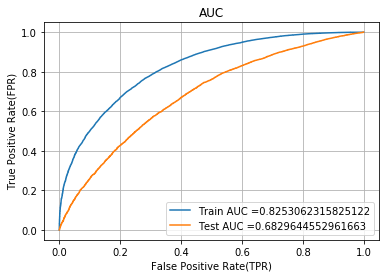

In [357]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier(max_depth = 10, n_estimators = 1000)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C) Confusion Matrix

In [358]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data

In [359]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24999999796471448, 'for threshold', 0.837)
[[ 5541  5542]
 [ 5462 56651]]


In [360]:
conf_matr_df_train_1_rf = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24999999796471448, 'for threshold', 0.837)


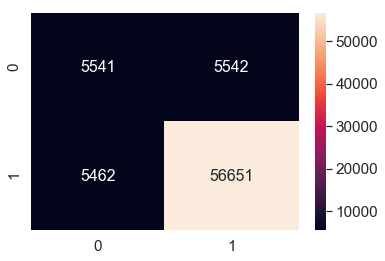

In [628]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1_rf, annot=True,annot_kws={"size": 16}, fmt='g')

### Test data

In [361]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24999999161092998, 'for threshold', 0.845)
[[ 3270  2189]
 [10079 20514]]


In [362]:
conf_matr_df_test_1_rf = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24999999161092998, 'for threshold', 0.845)


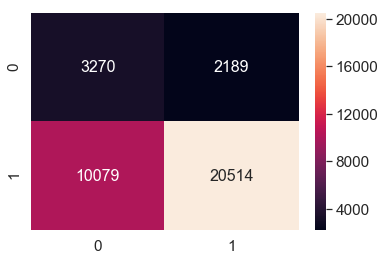

In [627]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1_rf, annot=True,annot_kws={"size": 16}, fmt='g')

# D) Extracting top 20 features 

In [363]:
aaa = model.feature_importances_

In [364]:
aaa.shape

(16903,)

In [365]:
important_bow_features_value = list(aaa[::])

In [366]:
bow_features_names = []

In [367]:
bow_features_names.append("cat_0")
bow_features_names.append("cat_1")
bow_features_names.append("subcat_0")
bow_features_names.append("subcat_1")
bow_features_names.append("state_0")
bow_features_names.append("state_1")
bow_features_names.append("proj_grade_0")
bow_features_names.append("proj_grade_1")
bow_features_names.append("teacher_prefix_0")
bow_features_names.append("teacher_prefix_1")

In [368]:
len(bow_features_names)

10

In [369]:
bow_features_names.append("price")
bow_features_names.append("quantity")
bow_features_names.append("prev_projects")
bow_features_names.append("title_word_count")
bow_features_names.append("essay_word_count")
bow_features_names.append("essay_sent_pos")
bow_features_names.append("essay_sent_neg")
bow_features_names.append("essay_sent_neu")
bow_features_names.append("essay_sent_comp")

In [370]:
len(bow_features_names)

19

In [371]:
for a in vectorizer_bow_title.get_feature_names() :
    bow_features_names.append(a)

In [372]:
len(bow_features_names)

2642

In [373]:
for a in vectorizer_bow_essay.get_feature_names() :
    bow_features_names.append(a)

In [374]:
len(bow_features_names)

16903

In [375]:
final_bow_features = pd.DataFrame({'feature_prob_estimates' : important_bow_features_value, 'feature_names' : bow_features_names})

In [376]:
bow1 = final_bow_features.sort_values(by = ['feature_prob_estimates'], ascending = False)

In [377]:
final1 = bow1.head(20)

In [378]:
bow1.head(20)

feature_names  feature_prob_estimates
10460      materials                0.018383
15062       supplies                0.014559
4244           books                0.011474
16192            use                0.010922
4948     chromebooks                0.009586
12880        reading                0.008636
16719         wobble                0.008635
12     prev_projects                0.007608
4795          chairs                0.006998
12873           read                0.006940
14912       students                0.006698
14796         stools                0.006632
3301           allow                0.005496
4236            book                0.004871
3326            also                0.004748
9518           ipads                0.004489
9558           items                0.004399
1092           hands                0.004359
3892           balls                0.004204
15412            the                0.004079

# E) WordCloud for top 20 features  

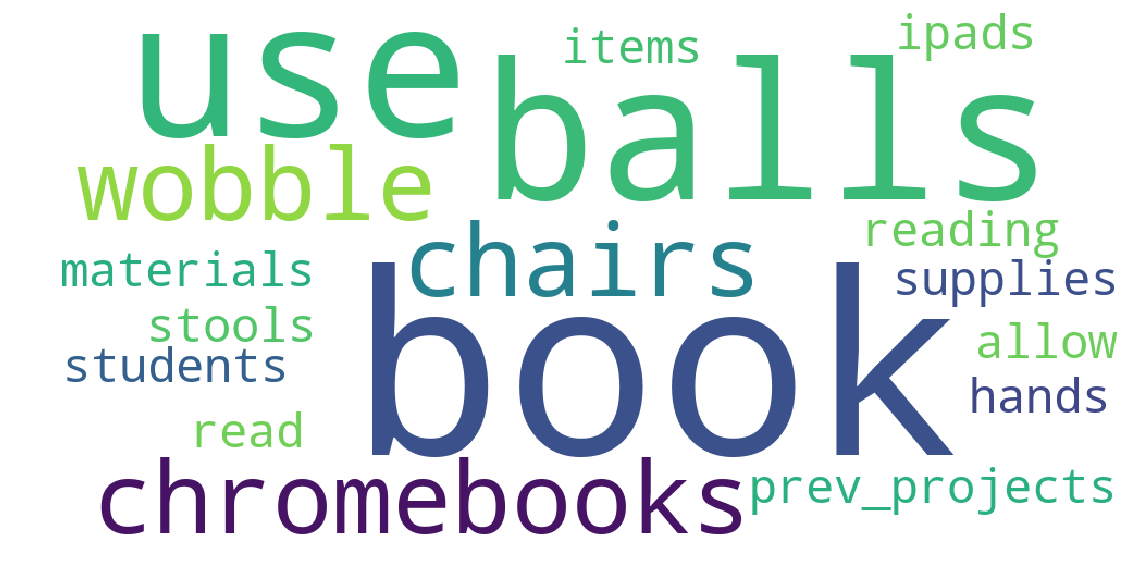

In [379]:
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(final1['feature_names'])
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("bow-rf"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Set 2 : Categorical, Numerical features + Project_title(TFIDF) + Preprocessed_essay (TFIDF min_df=10)

In [222]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((cat_0_train, cat_1_train, subcat_0_train, subcat_1_train, state_0_train, state_1_train, proj_grade_0_train, proj_grade_1_train, teacher_prefix_0_train, teacher_prefix_1_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train, title_tfidf_train, text_tfidf_train)).tocsr()
X_te = hstack((cat_0_test, cat_1_test, subcat_0_test, subcat_1_test, state_0_test, state_1_test, proj_grade_0_test, proj_grade_1_test, teacher_prefix_0_test, teacher_prefix_1_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test, title_tfidf_test, text_tfidf_test)).tocsr()

In [223]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
((73196, 16879), (73196,))
((36052, 16879), (36052,))


# A) GridSearchCV (K fold Cross Validation)

In [ ]:
rf = RandomForestClassifier()

parameters = {'n_estimators': [10, 100, 500, 1000], 'max_depth':[10, 50, 100, 500, 1000]}

clf = GridSearchCV(rf, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

# Plot for Train & Cross Validation Data

In [224]:
x1 = [0.685562  , 0.82288902, 0.84881871, 0.85728958, 0.95361686,
       0.99945537, 0.99992037, 0.9999465 , 0.99236202, 0.99997822,
       0.99998754, 0.99998563, 0.99966075, 0.9999999 , 0.9999999 ,
       0.9999999 , 0.99969814, 0.99999988, 0.9999999 , 0.9999999 ]

In [225]:
x2 = [0.61809514, 0.655087  , 0.67081169, 0.67383125, 0.58429271,
       0.65943456, 0.68343344, 0.68788744, 0.5803628 , 0.6634886 ,
       0.68149903, 0.68575756, 0.58691919, 0.66321182, 0.68309546,
       0.68216163, 0.58150236, 0.65985137, 0.67988075, 0.68303975]

In [226]:
y1 = pd.Series([10,100,500,1000,10,100,500,1000,10,100,500,1000,10,100,500,1000,10,100,500,1000], index = x1)

In [227]:
z1 = pd.Series([10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500,1000,1000,1000,1000],index = x1)

In [233]:
trace1 = go.Scatter3d(
    x=x1, y=y1, z=z1,
    name = 'Train',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

trace2 = go.Scatter3d(
    x=x2, y=y1, z=z1,
    name = 'Test',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#b45c1f',
        width=1
    )
)

In [234]:
data = [trace1, trace2]

In [235]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- Random Forests - TFIDF',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [236]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Random-Forests-c', height=700)

## Observations : 

### 1) We understand from the 2 plots that the Random Forests with depth of 1000 performs great on Training Data but doesnt perform well on unseen data (cross validation data) . => Probably a case of Overfitting.

### 2) Number of estimators as 100, 500 & 1000 performs decently on both Train as well as Cross Validation Data.

### 3) 10 as the value for maximum depth is considered.

# B) Train the model using the best hyper parameter value

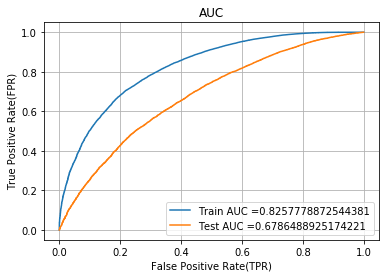

In [396]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier(max_depth = 10, n_estimators = 1000)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C) Confusion Matrix

In [397]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data

In [398]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
('the maximum value of tpr*(1-fpr)', 0.2499999979647145, 'for threshold', 0.836)
[[ 5542  5541]
 [ 5421 56692]]


In [399]:
conf_matr_df_train_2_rf = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.2499999979647145, 'for threshold', 0.836)


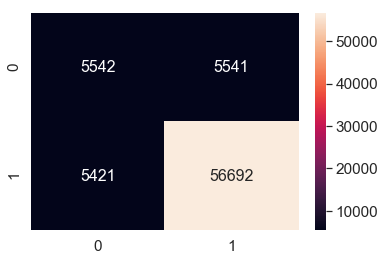

In [626]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_2_rf, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [400]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24999999161092998, 'for threshold', 0.847)
[[ 3255  2204]
 [10489 20104]]


In [401]:
conf_matr_df_test_2_rf = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24999999161092998, 'for threshold', 0.847)


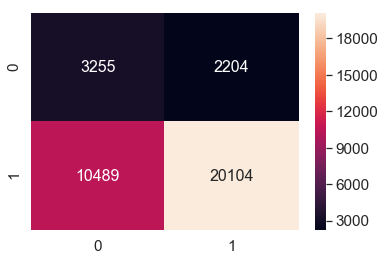

In [625]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2_rf, annot=True,annot_kws={"size": 16}, fmt='g')

# D) Extracting top 20 features 

In [402]:
bbb = model.feature_importances_

In [403]:
bbb.shape

(16903,)

In [404]:
important_tfidf_features_value = list(bbb[::])

In [405]:
tfidf_features_names = []

In [406]:
tfidf_features_names.append("cat_0")
tfidf_features_names.append("cat_1")
tfidf_features_names.append("subcat_0")
tfidf_features_names.append("subcat_1")
tfidf_features_names.append("state_0")
tfidf_features_names.append("state_1")
tfidf_features_names.append("proj_grade_0")
tfidf_features_names.append("proj_grade_1")
tfidf_features_names.append("teacher_prefix_0")
tfidf_features_names.append("teacher_prefix_1")

In [407]:
len(tfidf_features_names)

10

In [408]:
tfidf_features_names.append("price")
tfidf_features_names.append("quantity")
tfidf_features_names.append("prev_projects")
tfidf_features_names.append("title_word_count")
tfidf_features_names.append("essay_word_count")
tfidf_features_names.append("essay_sent_pos")
tfidf_features_names.append("essay_sent_neg")
tfidf_features_names.append("essay_sent_neu")
tfidf_features_names.append("essay_sent_comp")

In [409]:
len(tfidf_features_names)

19

In [410]:
for a in vectorizer_tfidf_titles.get_feature_names() :
    tfidf_features_names.append(a)

In [411]:
for a in vectorizer_tfidf_essay.get_feature_names() :
    tfidf_features_names.append(a)

In [412]:
len(tfidf_features_names)

16903

In [413]:
final_tfidf_features = pd.DataFrame({'feature_prob_estimates' : important_tfidf_features_value, 'feature_names' : tfidf_features_names})

In [414]:
tfidf1 = final_tfidf_features.sort_values(by = ['feature_prob_estimates'], ascending = False)

In [415]:
final2 = tfidf1.head(20)

In [416]:
tfidf1.head(20)

feature_names  feature_prob_estimates
10460      materials                0.020076
15062       supplies                0.013344
10996         nannan                0.012913
8515           hands                0.009696
4244           books                0.008236
16192            use                0.006864
12873           read                0.006062
16719         wobble                0.006011
9558           items                0.005859
4948     chromebooks                0.005484
12880        reading                0.005468
4795          chairs                0.004644
16461           want                0.004355
3049      activities                0.004254
12     prev_projects                0.004221
14796         stools                0.004119
6814       education                0.004071
4236            book                0.003837
3301           allow                0.003798
15446          these                0.003685

# E) WordCloud for top 20 features  

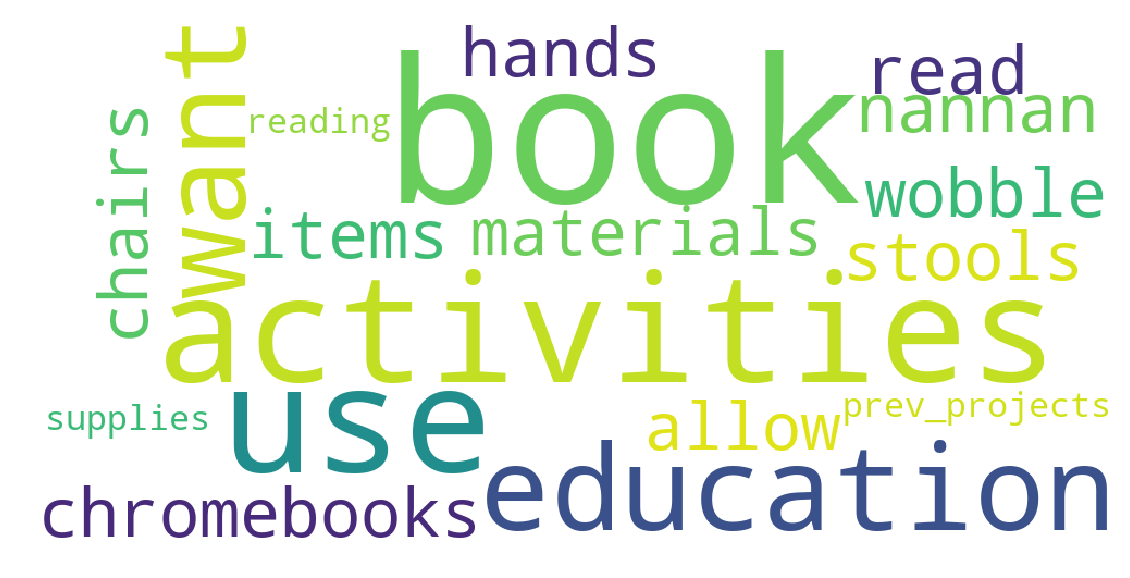

In [417]:
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(final2['feature_names'])
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("tfidf-rf"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Set 3 : Categorical, Numerical features + Project_title(AVG W2V) + Preprocessed_essay (AVG W2V)

In [237]:
avg_w2v_vectors_train2d = np.array(avg_w2v_vectors_train)

In [238]:
avg_w2v_vectors_train2d.shape

(73196, 300)

In [239]:
avg_w2v_vectors_titles_train2d = np.array(avg_w2v_vectors_titles_train)

In [240]:
avg_w2v_vectors_titles_train2d.shape

(73196, 300)

In [241]:
print(cat_0_train.shape)
print(cat_1_train.shape)
print(subcat_0_train.shape)
print(subcat_1_train.shape)
print(state_0_train.shape)
print(state_1_train.shape)
print(proj_grade_0_train.shape)
print(proj_grade_1_train.shape)
print(teacher_prefix_0_train.shape)
print(teacher_prefix_1_train.shape)
print(price_train.shape)
print(quantity_train.shape)
print(prev_projects_train.shape)
print(title_word_count_train.shape)
print(essay_word_count_train.shape)
print(essay_sent_pos_train.shape)
print(essay_sent_neg_train.shape) 
print(essay_sent_neu_train.shape)
print(essay_sent_comp_train.shape)
print(avg_w2v_vectors_train2d.shape)
print(avg_w2v_vectors_titles_train2d.shape)

(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 300)
(73196, 300)


In [242]:
X_tr = np.hstack((cat_0_train, cat_1_train, subcat_0_train, subcat_1_train, state_0_train, state_1_train, proj_grade_0_train, proj_grade_1_train, teacher_prefix_0_train, teacher_prefix_1_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train, avg_w2v_vectors_train2d, avg_w2v_vectors_titles_train2d))

In [243]:
print(X_tr.shape)
print("="*100)

(73196, 619)


In [244]:
avg_w2v_vectors_test2d = np.array(avg_w2v_vectors_test)

In [245]:
avg_w2v_vectors_test2d.shape

(36052, 300)

In [246]:
avg_w2v_vectors_titles_test2d = np.array(avg_w2v_vectors_titles_test)

In [247]:
avg_w2v_vectors_titles_test2d.shape

(36052, 300)

In [248]:
print(cat_0_test.shape)
print(cat_1_test.shape)
print(subcat_0_test.shape)
print(subcat_1_test.shape)
print(state_0_test.shape)
print(state_1_test.shape)
print(proj_grade_0_test.shape)
print(proj_grade_1_test.shape)
print(teacher_prefix_0_test.shape)
print(teacher_prefix_1_test.shape)
print(price_test.shape)
print(quantity_test.shape)
print(prev_projects_test.shape)
print(title_word_count_test.shape)
print(essay_word_count_test.shape)
print(essay_sent_pos_test.shape)
print(essay_sent_neg_test.shape) 
print(essay_sent_neu_test.shape)
print(essay_sent_comp_test.shape)
print(avg_w2v_vectors_test2d.shape)
print(avg_w2v_vectors_titles_test2d.shape)

(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 300)
(36052, 300)


In [249]:
X_te = np.hstack((cat_0_test, cat_1_test, subcat_0_test, subcat_1_test, state_0_test, state_1_test, proj_grade_0_test, proj_grade_1_test, teacher_prefix_0_test, teacher_prefix_1_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test, avg_w2v_vectors_test2d, avg_w2v_vectors_titles_test2d))

In [250]:
print(X_te.shape)
print("="*100)

(36052, 619)


# A) GridSearchCV (K fold Cross Validation)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10)

parameters = {'max_depth':[10, 50, 100, 500, 1000]}

clf = GridSearchCV(rf, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50)

parameters = {'max_depth':[10, 50, 100, 500, 1000]}

clf = GridSearchCV(rf, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)

parameters = {'max_depth':[10, 50, 100, 500, 1000]}

clf = GridSearchCV(rf, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 250)

parameters = {'max_depth':[10, 50, 100, 500, 1000]}

clf = GridSearchCV(rf, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

# Plot for Train & Cross Validation Data

In [251]:
x1 = [0.84673233, 0.99948941, 0.99952133, 0.99950371, 0.99948851,
      0.91948596, 0.99999876, 0.99999958, 0.99999865, 0.9999996,
      0.93061507, 0.99999978, 0.99999987, 0.9999999 , 0.99999989,
      0.93709022, 0.99999991, 0.99999992, 0.99999992, 0.99999992]

In [252]:
x2 = [0.62095407, 0.56943484, 0.57448469, 0.5736693 , 0.57603487,
      0.65541158, 0.61195694, 0.61256132, 0.61521871, 0.61477603,
      0.66813703, 0.62271974, 0.62329389, 0.62331725, 0.62275901,
      0.67263273, 0.62947776, 0.62959031, 0.62805141, 0.6309876]

In [253]:
y1 = pd.Series([10,50,100,500,1000,10,50,100,500,1000,10,50,100,500,1000,10,50,100,500,1000], index = x1)

In [254]:
z1 = pd.Series([10,10,10,10,10,50,50,50,50,50,100,100,100,100,100,250,250,250,250,250],index = x1)

In [255]:
trace1 = go.Scatter3d(
    x=x1, y=y1, z=z1,
    name = 'Train',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

trace2 = go.Scatter3d(
    x=x2, y=y1, z=z1,
    name = 'Test',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#b45c1f',
        width=1
    )
)

In [256]:
data = [trace1, trace2]

In [257]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- Random Forests - AVG W2V',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [258]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Random-Forests-e', height=700)

## Observations : 

### 1) We understand from the 2 plots that the Random Forests with maximum depth of trees as 1000 performs great (almost perfect) on Training Data but performs pretty bad on unseen data (cross validation data) . => Probably a case of Overfitting.

### 2) Number of estimators as 250, performs decently on both Train as well as Cross Validation Data.

### 3) 10 as the value for maximum depth is considered.

# B) Train the model using the best hyper parameter value

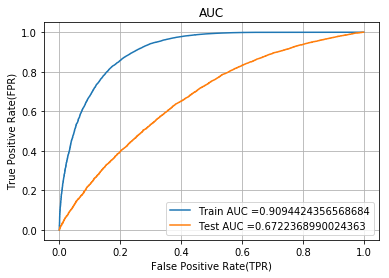

In [446]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier(max_depth = 10, n_estimators = 250)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C) Confusion Matrix

In [447]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data

In [448]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24999998168243034, 'for threshold', 0.775)
[[ 5540  5543]
 [  416 61697]]


In [449]:
conf_matr_df_train_3_rf = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24999998168243034, 'for threshold', 0.775)


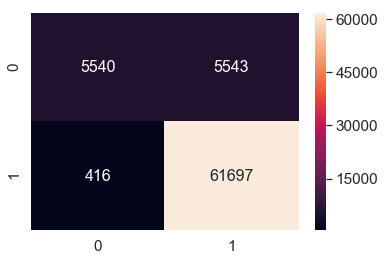

In [624]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_3_rf, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [450]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
('the maximum value of tpr*(1-fpr)', 0.2499999244983697, 'for threshold', 0.828)
[[ 2535  2924]
 [ 6554 24039]]


In [451]:
conf_matr_df_test_3_rf = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.2499999244983697, 'for threshold', 0.828)


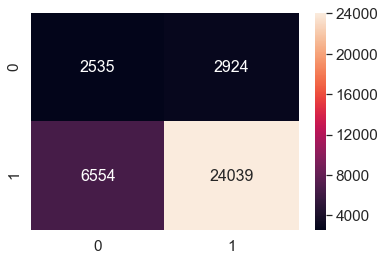

In [623]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_3_rf, annot=True,annot_kws={"size": 16}, fmt='g')

## Set 4 : Categorical, Numerical features + Project_title(TFIDF W2V) + Preprocessed_essay (TFIDF W2V)

In [315]:
tfidf_w2v_vectors_train2d = np.array(tfidf_w2v_vectors_train)

In [316]:
tfidf_w2v_vectors_train2d.shape

(73196, 300)

In [317]:
tfidf_w2v_vectors_titles_train2d = np.array(tfidf_w2v_vectors_titles_train)

In [318]:
tfidf_w2v_vectors_titles_train2d.shape

(73196, 300)

In [319]:
print(cat_0_train.shape)
print(cat_1_train.shape)
print(subcat_0_train.shape)
print(subcat_1_train.shape)
print(state_0_train.shape)
print(state_1_train.shape)
print(proj_grade_0_train.shape)
print(proj_grade_1_train.shape)
print(teacher_prefix_0_train.shape)
print(teacher_prefix_1_train.shape)
print(price_train.shape)
print(quantity_train.shape)
print(prev_projects_train.shape)
print(title_word_count_train.shape)
print(essay_word_count_train.shape)
print(essay_sent_pos_train.shape)
print(essay_sent_neg_train.shape) 
print(essay_sent_neu_train.shape)
print(essay_sent_comp_train.shape)
print(tfidf_w2v_vectors_train2d.shape)
print(tfidf_w2v_vectors_titles_train2d.shape)

(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 1)
(73196, 300)
(73196, 300)


In [320]:
X_tr = np.hstack((cat_0_train, cat_1_train, subcat_0_train, subcat_1_train, state_0_train, state_1_train, proj_grade_0_train, proj_grade_1_train, teacher_prefix_0_train, teacher_prefix_1_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train, tfidf_w2v_vectors_train2d, tfidf_w2v_vectors_titles_train2d))

In [321]:
print(X_tr.shape)
print("="*100)

(73196, 619)


In [322]:
tfidf_w2v_vectors_test2d = np.array(tfidf_w2v_vectors_test)

In [323]:
tfidf_w2v_vectors_test2d.shape

(36052, 300)

In [324]:
tfidf_w2v_vectors_titles_test2d = np.array(tfidf_w2v_vectors_titles_test)

In [325]:
tfidf_w2v_vectors_titles_test2d.shape

(36052, 300)

In [326]:
print(cat_0_test.shape)
print(cat_1_test.shape)
print(subcat_0_test.shape)
print(subcat_1_test.shape)
print(state_0_test.shape)
print(state_1_test.shape)
print(proj_grade_0_test.shape)
print(proj_grade_1_test.shape)
print(teacher_prefix_0_test.shape)
print(teacher_prefix_1_test.shape)
print(price_test.shape)
print(quantity_test.shape)
print(prev_projects_test.shape)
print(title_word_count_test.shape)
print(essay_word_count_test.shape)
print(essay_sent_pos_test.shape)
print(essay_sent_neg_test.shape) 
print(essay_sent_neu_test.shape)
print(essay_sent_comp_test.shape)
print(tfidf_w2v_vectors_test2d.shape)
print(tfidf_w2v_vectors_titles_test2d.shape)

(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 1)
(36052, 300)
(36052, 300)


In [327]:
X_te = np.hstack((cat_0_test, cat_1_test, subcat_0_test, subcat_1_test, state_0_test, state_1_test, proj_grade_0_test, proj_grade_1_test, teacher_prefix_0_test, teacher_prefix_1_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test, tfidf_w2v_vectors_test2d, tfidf_w2v_vectors_titles_test2d))

In [328]:
print(X_te.shape)
print("="*100)

(36052, 619)


# A) GridSearchCV (K fold Cross Validation)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {'n_estimators': [10, 25, 50, 100, 250], 'max_depth':[10, 50, 100, 500]}

clf = GridSearchCV(rf, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

# Plot for Train & Cross Validation Data

In [273]:
x1 = [0.53114756, 0.53280202, 0.53286782, 0.532964  , 0.53312063,
       0.53283393, 0.53298766, 0.53293651, 0.5331403 , 0.53314039,
       0.53287494, 0.53301328, 0.53294784, 0.53316433, 0.53316619,
       0.53289102, 0.53293372, 0.53309011, 0.5331474 , 0.53316773]

In [274]:
x2 = [0.52897712, 0.52773419, 0.52968157, 0.5293205 , 0.52784254,
       0.52744026, 0.5276696 , 0.52924379, 0.5276494 , 0.52783335,
       0.52750441, 0.52754582, 0.52906785, 0.52768812, 0.52766225,
       0.52757189, 0.52942785, 0.52748851, 0.52741293, 0.52752519]

In [275]:
y1 = pd.Series([10,25,50,100,250,10,25,50,100,250,10,25,50,100,250,10,25,50,100,250], index = x1)

In [276]:
z1 = pd.Series([10,10,10,10,10,50,50,50,50,50,100,100,100,100,100,500,500,500,500,500],index = x1)

In [277]:
trace1 = go.Scatter3d(
    x=x1, y=y1, z=z1,
    name = 'Train',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

trace2 = go.Scatter3d(
    x=x2, y=y1, z=z1,
    name = 'Test',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#b45c1f',
        width=1
    )
)

In [278]:
data = [trace1, trace2]

In [279]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- Random Forests - TFIDF W2V',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [280]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Random-Forests-g', height=700)

## Observations : 

### 1) Number of estimators as 10, performs decently on both Train as well as Cross Validation Data.

### 2) 50 as the value for maximum depth is considered.

# B) Train the model using the best hyper parameter value

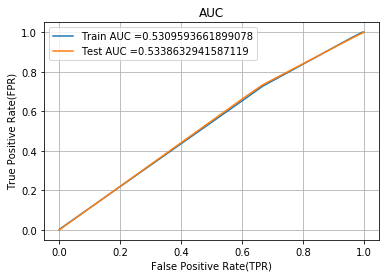

In [334]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier(max_depth = 10, n_estimators = 50)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C) Confusion Matrix

In [335]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data

In [336]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
('the maximum value of tpr*(1-fpr)', 0.23755274534005302, 'for threshold', 0.852)
[[ 4305  6778]
 [20813 41300]]


In [337]:
conf_matr_df_train_4_rf = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.23755274534005302, 'for threshold', 0.852)


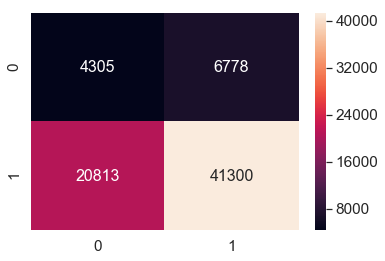

In [340]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_4_rf, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [338]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
('the maximum value of tpr*(1-fpr)', 0.23880877084654542, 'for threshold', 0.944)
[[ 5457     2]
 [30582    11]]


In [339]:
conf_matr_df_test_4_rf = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.23880877084654542, 'for threshold', 0.944)


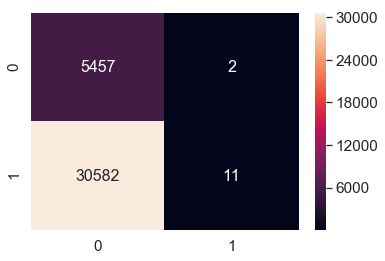

In [341]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4_rf, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>4. Gradient Boosted Decision Trees </h1>

## Set 1: Categorical, Numerical features + Project_title(BOW) + Preprocessed_essay (BOW with min_df=10)

In [281]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((cat_0_train, cat_1_train, subcat_0_train, subcat_1_train, state_0_train, state_1_train, proj_grade_0_train, proj_grade_1_train, teacher_prefix_0_train, teacher_prefix_1_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((cat_0_test, cat_1_test, subcat_0_test, subcat_1_test, state_0_test, state_1_test, proj_grade_0_test, proj_grade_1_test, teacher_prefix_0_test, teacher_prefix_1_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test, title_bow_test, text_bow_test)).tocsr()

In [282]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
((73196, 16879), (73196,))
((36052, 16879), (36052,))


# A) GridSearchCV (K fold Cross Validation)

In [487]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbdt = GradientBoostingClassifier(max_depth = 5)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

In [ ]:
gbdt = GradientBoostingClassifier(max_depth = 10)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

In [ ]:
gbdt = GradientBoostingClassifier(max_depth = 15)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

In [ ]:
gbdt = GradientBoostingClassifier(max_depth = 20)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

# Plot for Train & Cross Validation Data

In [283]:
x1 = [0.67582738, 0.72500528, 0.77143682, 0.82012709, 0.88460666,
      0.79045531, 0.86672091, 0.91705308, 0.95213486, 0.9805429,
      0.88769152, 0.95135135, 0.98170154, 0.99366322, 0.99832629,
      0.94014488, 0.98529687, 0.9972215 , 0.99911791, 0.99979793]

In [284]:
x2 = [0.64004457, 0.66192722, 0.6792036 , 0.69118161, 0.70065091,
      0.6505509 , 0.66652814, 0.68314909, 0.6925425 , 0.69962842,
      0.64314828, 0.66120248, 0.67646775, 0.68655422, 0.69627902,
      0.63211968, 0.65282809, 0.6703488 , 0.68034096, 0.68968672]

In [285]:
z1 = [5, 5, 5, 5, 5,
    10, 10, 10, 10, 10,
    15, 15, 15, 15, 15,
    20, 20, 20, 20, 20]

In [286]:
y1 = [10, 25, 50, 100, 250,
     10, 25, 50 ,100, 250,
     10, 25, 50, 100, 250,
     10, 25, 50, 100, 250]

In [287]:
trace1 = go.Scatter3d(
    x=x1, y=y1, z=z1,
    name = 'Train',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

trace2 = go.Scatter3d(
    x=x2, y=y1, z=z1,
    name = 'Test',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#b45c1f',
        width=1
    )
)

In [288]:
data = [trace1, trace2]

In [289]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- GBDT - BOW',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [290]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='GBDT - a', height=700)

## Observations : 

### 1) Number of estimators as 100 to 250, performs decently on both Train as well as Cross Validation Data.

### 2) 5 as the value for maximum depth is considered. Shallow trees generally perform well for GBDT.

### 3) 250 as number of estimators is considered for training the final model.

# B) Train the model using the best hyper parameter value

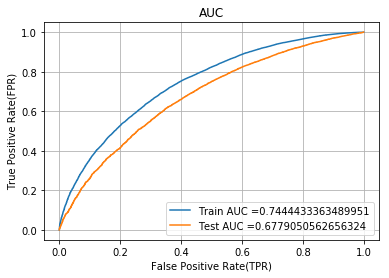

In [502]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier(max_depth = 5, n_estimators = 500)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C) Confusion Matrix

In [503]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data

In [504]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
('the maximum value of tpr*(1-fpr)', 0.2499999979647145, 'for threshold', 0.844)
[[ 5542  5541]
 [10955 51158]]


In [505]:
conf_matr_df_train_1_gbdt = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.2499999979647145, 'for threshold', 0.844)


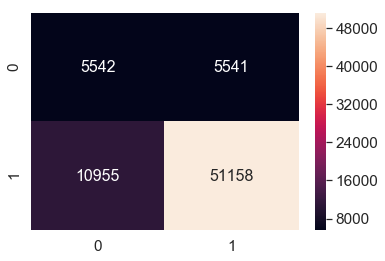

In [620]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1_gbdt, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [506]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24999999161092995, 'for threshold', 0.848)
[[ 3855  1604]
 [13949 16644]]


In [507]:
conf_matr_df_test_1_gbdt = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24999999161092995, 'for threshold', 0.848)


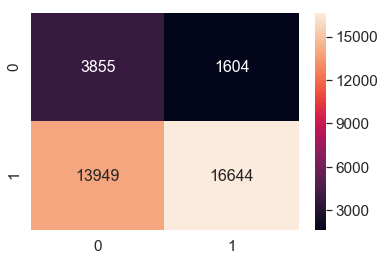

In [619]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1_gbdt, annot=True,annot_kws={"size": 16}, fmt='g')

# D) Extracting top 20 features 

In [508]:
ccc = model.feature_importances_

In [509]:
ccc.shape

(16903,)

In [510]:
important_bow_features_value2 = list(ccc[::])

In [511]:
bow_features_names = []

In [512]:
bow_features_names.append("cat_0")
bow_features_names.append("cat_1")
bow_features_names.append("subcat_0")
bow_features_names.append("subcat_1")
bow_features_names.append("state_0")
bow_features_names.append("state_1")
bow_features_names.append("proj_grade_0")
bow_features_names.append("proj_grade_1")
bow_features_names.append("teacher_prefix_0")
bow_features_names.append("teacher_prefix_1")

In [513]:
len(bow_features_names)

10

In [514]:
bow_features_names.append("price")
bow_features_names.append("quantity")
bow_features_names.append("prev_projects")
bow_features_names.append("title_word_count")
bow_features_names.append("essay_word_count")
bow_features_names.append("essay_sent_pos")
bow_features_names.append("essay_sent_neg")
bow_features_names.append("essay_sent_neu")
bow_features_names.append("essay_sent_comp")

In [515]:
len(bow_features_names)

19

In [516]:
for a in vectorizer_bow_title.get_feature_names() :
    bow_features_names.append(a)

In [517]:
for a in vectorizer_bow_essay.get_feature_names() :
    bow_features_names.append(a)

In [518]:
len(bow_features_names)

16903

In [519]:
final_bow_features2 = pd.DataFrame({'feature_prob_estimates' : important_bow_features_value2, 'feature_names' : bow_features_names})

In [520]:
bow2 = final_bow_features2.sort_values(by = ['feature_prob_estimates'], ascending = False)

In [521]:
final3 = bow2.head(20)

In [522]:
bow2.head(20)

feature_names  feature_prob_estimates
10460      materials                0.021183
16192            use                0.020484
4244           books                0.014829
12880        reading                0.013258
15062       supplies                0.012769
12     prev_projects                0.011941
4948     chromebooks                0.011664
16719         wobble                0.010462
12873           read                0.009851
14796         stools                0.009619
3301           allow                0.009203
3326            also                0.008626
9518           ipads                0.007855
4236            book                0.007680
14912       students                0.007522
15412            the                0.007145
8742           hokki                0.007056
4795          chairs                0.006832
10379  manipulatives                0.006691
3531            apps                0.006588

# E) WordCloud for top 20 features  

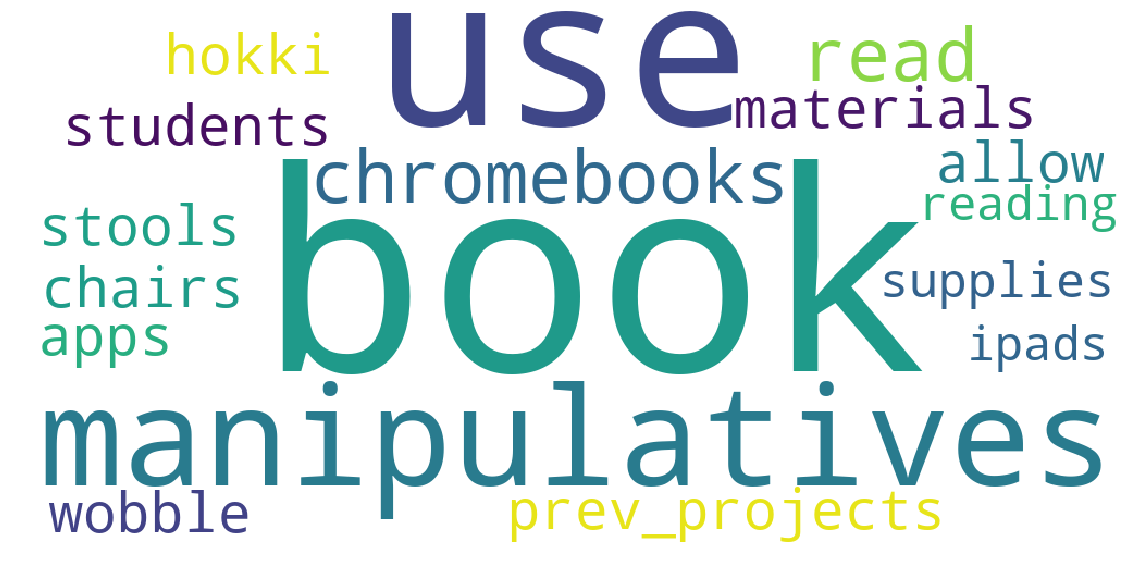

In [523]:
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(final3['feature_names'])
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("bow-gbdt"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Set 2 : Categorical, Numerical features + Project_title(TFIDF) + Preprocessed_essay (TFIDF min_df=10)

In [524]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((cat_0_train, cat_1_train, subcat_0_train, subcat_1_train, state_0_train, state_1_train, proj_grade_0_train, proj_grade_1_train, teacher_prefix_0_train, teacher_prefix_1_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train, title_tfidf_train, text_tfidf_train)).tocsr()
X_te = hstack((cat_0_test, cat_1_test, subcat_0_test, subcat_1_test, state_0_test, state_1_test, proj_grade_0_test, proj_grade_1_test, teacher_prefix_0_test, teacher_prefix_1_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test, title_tfidf_test, text_tfidf_test)).tocsr()

In [525]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
((73196, 16903), (73196,))
((36052, 16903), (36052,))


# A) GridSearchCV (K fold Cross Validation)

In [ ]:
gbdt = GradientBoostingClassifier(max_depth = 5)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

In [ ]:
gbdt = GradientBoostingClassifier(max_depth = 10)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
 cv_auc

In [ ]:
gbdt = GradientBoostingClassifier(max_depth = 15)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

In [ ]:
gbdt = GradientBoostingClassifier(max_depth = 20)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

# Plot for Train & Cross Validation Data

In [291]:
x1 = [0.68185563, 0.73652587, 0.78343561, 0.83356098, 0.89585206,
      0.7963146 , 0.88325654, 0.93171969, 0.9614376 , 0.99083648,
      0.88866064, 0.96156783, 0.98712331, 0.99661058, 0.99973381,
      0.94028419, 0.98918665, 0.99799895, 0.99990567, 0.99999724]

In [292]:
x2 = [0.64434491, 0.66458129, 0.6785141 , 0.68681892, 0.69067573,
      0.64930291, 0.66634615, 0.67668473, 0.68090623, 0.68406166,
      0.64089905, 0.66098811, 0.66966531, 0.67464087, 0.67984691,
      0.62917969, 0.65115386, 0.66036358, 0.66829864, 0.67563431]

In [293]:
y1 = [10, 25, 50, 100, 250,
     10, 25, 50 ,100, 250,
     10, 25, 50, 100, 250,
     10, 25, 50, 100, 250]

In [294]:
z1 = [5, 5, 5, 5, 5,
    10, 10, 10, 10, 10,
    15, 15, 15, 15, 15,
    20, 20, 20, 20, 20]

In [295]:
trace1 = go.Scatter3d(
    x=x1, y=y1, z=z1,
    name = 'Train',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

trace2 = go.Scatter3d(
    x=x2, y=y1, z=z1,
    name = 'Test',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#b45c1f',
        width=1
    )
)

In [296]:
data = [trace1, trace2]

In [297]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- GBDT - TFIDF',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [298]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='GBDT - c', height=700)

## Observations : 

### 1) Number of estimators as 100, 250 performs decently on both Train as well as Cross Validation Data.

### 2) 5 as the value for maximum depth is considered. Shallow trees generally perform well for GBDT.

### 3) 250 as number of estimators is considered for training the final model.

# B) Train the model using the best hyper parameter value

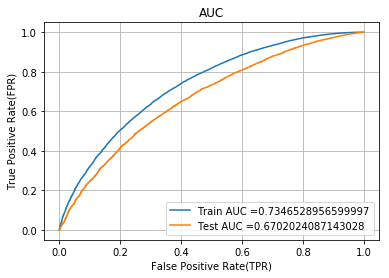

In [540]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier(max_depth = 5, n_estimators = 250)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C) Confusion Matrix

In [541]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data

In [542]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24999999796471448, 'for threshold', 0.844)
[[ 5541  5542]
 [11266 50847]]


In [543]:
conf_matr_df_train_2_gbdt = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24999999796471448, 'for threshold', 0.844)


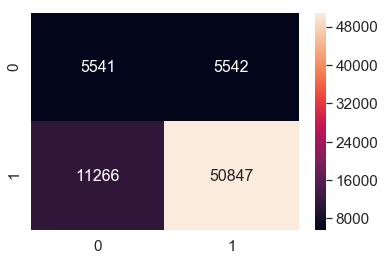

In [618]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_2_gbdt, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [544]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24999999161092995, 'for threshold', 0.85)
[[ 4012  1447]
 [15163 15430]]


In [545]:
conf_matr_df_test_2_gbdt = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24999999161092995, 'for threshold', 0.85)


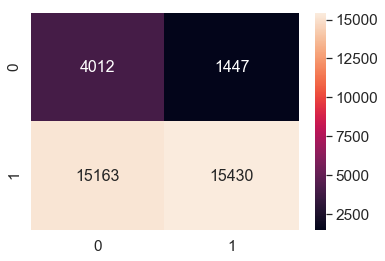

In [617]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2_gbdt, annot=True,annot_kws={"size": 16}, fmt='g')

# D) Extracting top 20 features 

In [546]:
ddd = model.feature_importances_

In [547]:
ddd.shape

(16903,)

In [548]:
important_tfidf2_features_value = list(ddd[::])

In [549]:
len(tfidf_features_names)

16903

In [550]:
final_tfidf_features2 = pd.DataFrame({'feature_prob_estimates' : important_tfidf2_features_value, 'feature_names' : tfidf_features_names})

In [551]:
tfidf2 = final_tfidf_features2.sort_values(by = ['feature_prob_estimates'], ascending = False)

In [552]:
final4 = tfidf2.head(20)

In [553]:
tfidf2.head(20)

feature_names  feature_prob_estimates
15062       supplies                0.017294
10460      materials                0.015861
12873           read                0.015680
10996         nannan                0.014087
9558           items                0.013980
4244           books                0.013662
16719         wobble                0.012422
12     prev_projects                0.008761
8515           hands                0.007675
10379  manipulatives                0.007657
4795          chairs                0.007463
12880        reading                0.007225
4948     chromebooks                0.007190
3049      activities                0.007167
16192            use                0.007137
16461           want                0.007077
3301           allow                0.006807
12877        readers                0.006678
3326            also                0.006163
8601      headphones                0.006083

# E) WordCloud for top 20 features  

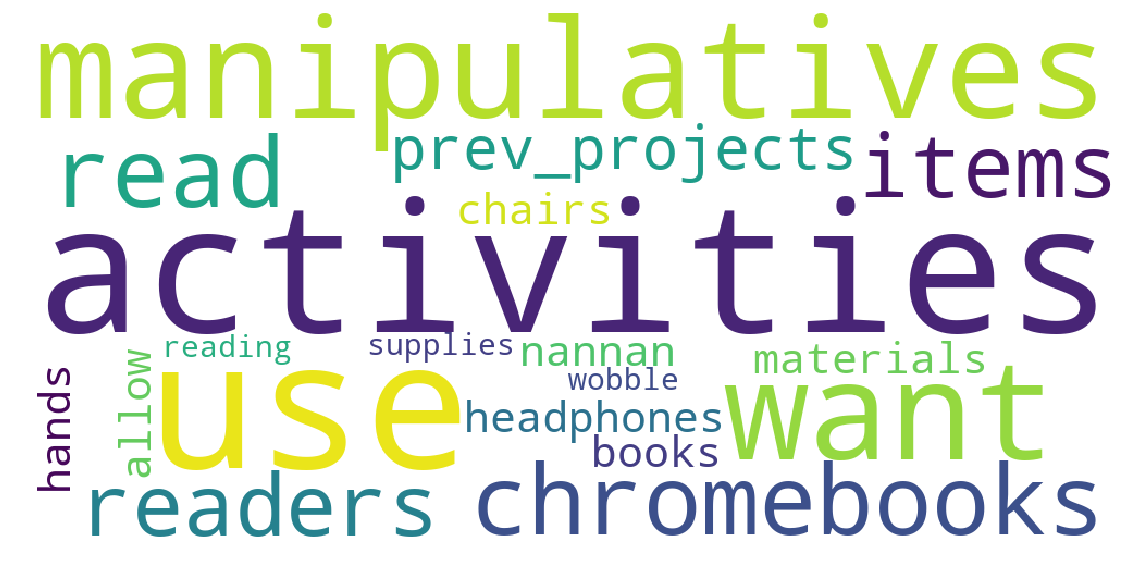

In [554]:
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(" ").join(final4['feature_names'])
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white').generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("tfidf-gbdt"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Set 3 : Categorical, Numerical features + Project_title(AVG W2V) + Preprocessed_essay (AVG W2V)

In [555]:
X_tr = np.hstack((cat_0_train, cat_1_train, subcat_0_train, subcat_1_train, state_0_train, state_1_train, proj_grade_0_train, proj_grade_1_train, teacher_prefix_0_train, teacher_prefix_1_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train, avg_w2v_vectors_train2d, avg_w2v_vectors_titles_train2d))
X_te = np.hstack((cat_0_test, cat_1_test, subcat_0_test, subcat_1_test, state_0_test, state_1_test, proj_grade_0_test, proj_grade_1_test, teacher_prefix_0_test, teacher_prefix_1_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test, avg_w2v_vectors_test2d, avg_w2v_vectors_titles_test2d))

In [556]:
print(X_tr.shape)
print(X_te.shape)

print("="*100)

(73196, 619)
(36052, 619)


# A) GridSearchCV (K fold Cross Validation)

In [ ]:
gbdt = GradientBoostingClassifier(max_depth = 2)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

In [ ]:
gbdt = GradientBoostingClassifier(max_depth = 5)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

In [ ]:
gbdt = GradientBoostingClassifier(max_depth = 10)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [ ]:
train_auc

In [ ]:
cv_auc

 ## Unable to carry out for more depth as my laptop is crashing due to low memory issues. The previous calculation took nearly 10 hours. Moreover Shallow trees are used in most cases for GBDT.

# Plot for Train & Cross Validation Data

In [299]:
x1 = [0.64592223, 0.67092147, 0.69021391, 0.71261743, 0.7489713,
      0.71735295, 0.76664657, 0.81348949, 0.86699111, 0.945333,
      0.93382633, 0.98754178, 0.99887753, 0.99999036, 0.99999992]

In [300]:
x2 = [0.63104713, 0.65152349, 0.66550835, 0.67574236, 0.68565279,
      0.65071475, 0.66605464, 0.67614747, 0.68278406, 0.68486847,
      0.63231531, 0.65195024, 0.65869979, 0.66893646, 0.67398144]

In [301]:
y1 = [10, 25, 50, 100, 250,
     10, 25, 50 ,100, 250,
     10, 25, 50, 100, 250]

In [302]:
z1 = [2, 2, 2, 2, 2,
      5, 5, 5, 5, 5,
      10, 10, 10, 10, 10]

In [303]:
trace1 = go.Scatter3d(
    x=x1, y=y1, z=z1,
    name = 'Train',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

trace2 = go.Scatter3d(
    x=x2, y=y1, z=z1,
    name = 'Test',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#b45c1f',
        width=1
    )
)

In [304]:
data = [trace1, trace2]

In [305]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- GBDT - AVG W2V',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [306]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='GBDT - e', height=700)

## Observations : 

### 1) Number of estimators as 100, 250 performs decently on both Train as well as Cross Validation Data.

### 2) 2 as the value for maximum depth is considered. Shallow trees generally perform well for GBDT.

### 3) 250 as number of estimators is considered for training the final model.

# B) Train the model using the best hyper parameter value

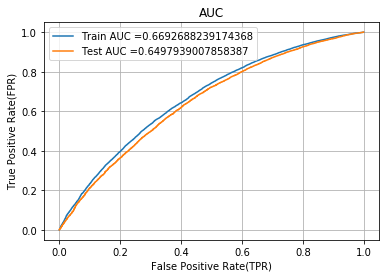

In [574]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier(max_depth = 2, n_estimators = 250)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C) Confusion Matrix

In [575]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data

In [576]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
('the maximum value of tpr*(1-fpr)', 0.2499999979647145, 'for threshold', 0.842)
[[ 5542  5541]
 [15943 46170]]


In [577]:
conf_matr_df_train_3_gbdt = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.2499999979647145, 'for threshold', 0.842)


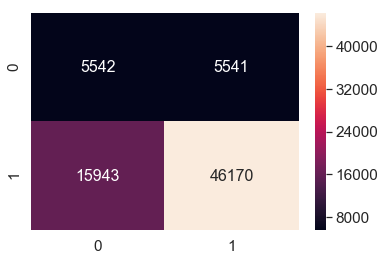

In [616]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_3_gbdt, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [578]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
('the maximum value of tpr*(1-fpr)', 0.24999999161092998, 'for threshold', 0.852)
[[ 4048  1411]
 [16958 13635]]


In [579]:
conf_matr_df_test_3_gbdt = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.24999999161092998, 'for threshold', 0.852)


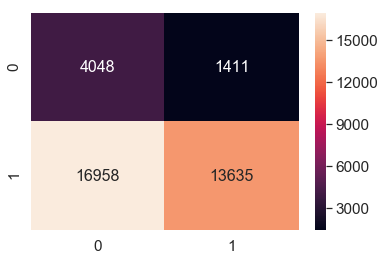

In [615]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_3_gbdt, annot=True,annot_kws={"size": 16}, fmt='g')

## Set 4 : Categorical, Numerical features + Project_title(TFIDF W2V) + Preprocessed_essay (TFIDF W2V)

In [580]:
X_tr = np.hstack((cat_0_train, cat_1_train, subcat_0_train, subcat_1_train, state_0_train, state_1_train, proj_grade_0_train, proj_grade_1_train, teacher_prefix_0_train, teacher_prefix_1_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_comp_train, tfidf_w2v_vectors_train2d, tfidf_w2v_vectors_titles_train2d))
X_te = np.hstack((cat_0_test, cat_1_test, subcat_0_test, subcat_1_test, state_0_test, state_1_test, proj_grade_0_test, proj_grade_1_test, teacher_prefix_0_test, teacher_prefix_1_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test, essay_sent_neu_test, essay_sent_comp_test, tfidf_w2v_vectors_test2d, tfidf_w2v_vectors_titles_test2d))

print(X_tr.shape)
print(X_te.shape)
print("="*100)
print("="*100)

(73196, 619)
(36052, 619)


# A) GridSearchCV (K fold Cross Validation)

In [581]:
gbdt = GradientBoostingClassifier(max_depth = 2)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [582]:
train_auc

array([0.53080052, 0.53246455, 0.53312984, 0.53393831, 0.53422282])

In [583]:
cv_auc

array([0.52938404, 0.529733  , 0.52907367, 0.52925354, 0.52948713])

In [584]:
gbdt = GradientBoostingClassifier(max_depth = 5)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [585]:
train_auc

array([0.5331676 , 0.53406131, 0.53431946, 0.53438263, 0.53438361])

In [586]:
cv_auc

array([0.52949363, 0.52911152, 0.52872403, 0.52908516, 0.52914161])

In [587]:
gbdt = GradientBoostingClassifier(max_depth = 10)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [588]:
train_auc

array([0.53374037, 0.53436044, 0.53438361, 0.53438361, 0.53438361])

In [589]:
cv_auc

array([0.52934568, 0.52892982, 0.52944466, 0.52904353, 0.52890247])

In [590]:
gbdt = GradientBoostingClassifier(max_depth = 15)

parameters = {'n_estimators': [10, 25, 50, 100, 250] }

clf = GridSearchCV(gbdt, parameters, cv= 3, scoring='roc_auc')

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 

In [591]:
train_auc

array([0.5343807 , 0.5343836 , 0.53438361, 0.53438361, 0.53438361])

In [592]:
cv_auc

array([0.52961642, 0.52954167, 0.52960136, 0.52949611, 0.52900793])

# Plot for Train & Cross Validation Data

In [307]:
x1 = [0.53080052, 0.53246455, 0.53312984, 0.53393831, 0.53422282,
      0.5331676 , 0.53406131, 0.53431946, 0.53438263, 0.53438361,
      0.53374037, 0.53436044, 0.53438361, 0.53438361, 0.53438361,
      0.5343807 , 0.5343836 , 0.53438361, 0.53438361, 0.53438361]

In [308]:
x2 = [0.52938404, 0.529733  , 0.52907367, 0.52925354, 0.52948713,
      0.52949363, 0.52911152, 0.52872403, 0.52908516, 0.52914161,
      0.52934568, 0.52892982, 0.52944466, 0.52904353, 0.52890247,
      0.52961642, 0.52954167, 0.52960136, 0.52949611, 0.52900793]

In [309]:
y1 = [10, 25, 50, 100, 250,
     10, 25, 50 ,100, 250,
     10, 25, 50, 100, 250,
     10, 25, 50, 100, 250]

In [310]:
z1 = [2, 2, 2, 2, 2,
      5, 5, 5, 5, 5,
      10, 10, 10, 10, 10,
      15, 15, 15, 15, 15]

In [311]:
trace1 = go.Scatter3d(
    x=x1, y=y1, z=z1,
    name = 'Train',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

trace2 = go.Scatter3d(
    x=x2, y=y1, z=z1,
    name = 'Test',
    marker=dict(
        size=4,
        colorscale='Viridis',
    ),
    line=dict(
        color='#b45c1f',
        width=1
    )
)

In [312]:
data = [trace1, trace2]

In [313]:
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- GBDT - TFIDF W2V',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [314]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='GBDT - g', height=700)

## Observations : 

### 1) Number of estimators as 100, 250 performs decently on both Train as well as Cross Validation Data.

### 2) 5 as the value for maximum depth is considered. Shallow trees generally perform well for GBDT.

### 3) 250 as number of estimators is considered for training the final model.

# B) Train the model using the best hyper parameter value

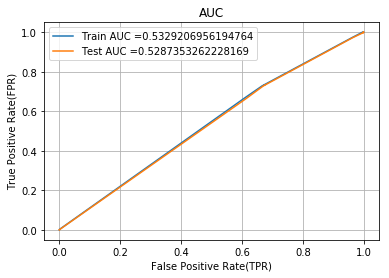

In [607]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier(max_depth = 5, n_estimators = 250)

model.fit(X_tr, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(model, X_tr)    
y_test_pred = batch_predict(model, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# C) Confusion Matrix

In [608]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### Train Data

In [609]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
('the maximum value of tpr*(1-fpr)', 0.23846163872283424, 'for threshold', 0.851)
[[ 4351  6732]
 [20759 41354]]


In [610]:
conf_matr_df_train_4_gbdt = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.23846163872283424, 'for threshold', 0.851)


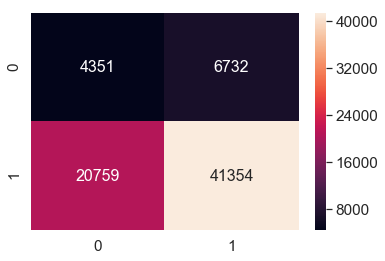

In [614]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_4_gbdt, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [611]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
('the maximum value of tpr*(1-fpr)', 0.2369549205939287, 'for threshold', 0.879)
[[ 5455     4]
 [30567    26]]


In [612]:
conf_matr_df_test_4_gbdt = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

('the maximum value of tpr*(1-fpr)', 0.2369549205939287, 'for threshold', 0.879)


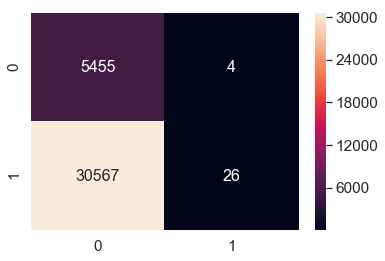

In [613]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4_gbdt, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>5. Conclusion</h1>

In [630]:
# Please compare all your models using Prettytable library

# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperparameters(max depth,min samples split)", "Train AUC", "Test AUC"]

x.add_row(["BOW", "RF","(10, 1000)", 0.8253, 0.6829])
x.add_row(["TFIDF", "RF", "(10, 1000)", 0.8257, 0.6786])
x.add_row(["AVG W2V", "RF", "(10, 250)", 0.9094, 0.6722])
x.add_row(["TFIDF W2V", "RF", "(500, 10)", 0.5337, 0.5273])

x.add_row(["----- ---", "----", "-------------------------------", "---------", "--------"])

x.add_row(["BOW", "GBDT","(5, 500)", 0.7444, 0.6779])
x.add_row(["TFIDF", "GBDT", "(5, 250)", 0.7346, 0.6702])
x.add_row(["AVG W2V", "GBDT", "(2, 250)", 0.6692, 0.6498])
x.add_row(["TFIDF W2V", "GBDT", "(5, 250)", 0.5329, 0.5287])



print(x)

+------------+-------+----------------------------------------------+-----------+----------+
| Vectorizer | Model | Hyperparameters(max depth,min samples split) | Train AUC | Test AUC |
+------------+-------+----------------------------------------------+-----------+----------+
|    BOW     |   RF  |                  (10, 1000)                  |   0.8253  |  0.6829  |
|   TFIDF    |   RF  |                  (10, 1000)                  |   0.8257  |  0.6786  |
|  AVG W2V   |   RF  |                  (10, 250)                   |   0.9094  |  0.6722  |
| TFIDF W2V  |   RF  |                  (500, 10)                   |   0.5337  |  0.5273  |
| ----- ---  |  ---- |       -------------------------------        | --------- | -------- |
|    BOW     |  GBDT |                   (5, 500)                   |   0.7444  |  0.6779  |
|   TFIDF    |  GBDT |                   (5, 250)                   |   0.7346  |  0.6702  |
|  AVG W2V   |  GBDT |                   (2, 250)                   | 